In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from copy import deepcopy
import calendar
import locale
import datetime
import multiprocessing as mp
import os
import openpyxl

In [2]:
directorio=r'C:\Users\Dell\Documents\Repositories\correccion-muestreo-velocidades\Datos' # use your path

In [3]:
archivos_8 = glob.glob(directorio + "\*8M.csv")
archivos_8.sort()
archivos_10 = glob.glob(directorio + "\*10M.csv")
archivos_10.sort()

In [4]:
def DatosProcesadosMes(archivos):
    li = []
    n = 0
    print('Se cargarán ',len(archivos),' archivos')
    for iArchivo in archivos:
        idf=pd.read_csv(iArchivo,index_col=0, low_memory=False)
        idf.index=pd.to_datetime(idf.index,format='%Y-%m-%d %H:%M:%S')
        li.append(idf)
        n+=1
        print('Restan: ',len(archivos)-n,' archivos por cargar')
    print('Todos los datos han sido cargados')
    return li

In [5]:
datos_8m = DatosProcesadosMes(archivos_8)
datos_10m = DatosProcesadosMes(archivos_10)

Se cargarán  25  archivos
Restan:  24  archivos por cargar
Restan:  23  archivos por cargar
Restan:  22  archivos por cargar
Restan:  21  archivos por cargar
Restan:  20  archivos por cargar
Restan:  19  archivos por cargar
Restan:  18  archivos por cargar
Restan:  17  archivos por cargar
Restan:  16  archivos por cargar
Restan:  15  archivos por cargar
Restan:  14  archivos por cargar
Restan:  13  archivos por cargar
Restan:  12  archivos por cargar
Restan:  11  archivos por cargar
Restan:  10  archivos por cargar
Restan:  9  archivos por cargar
Restan:  8  archivos por cargar
Restan:  7  archivos por cargar
Restan:  6  archivos por cargar
Restan:  5  archivos por cargar
Restan:  4  archivos por cargar
Restan:  3  archivos por cargar
Restan:  2  archivos por cargar
Restan:  1  archivos por cargar
Restan:  0  archivos por cargar
Todos los datos han sido cargados
Se cargarán  25  archivos
Restan:  24  archivos por cargar
Restan:  23  archivos por cargar
Restan:  22  archivos por cargar


In [69]:
def HistogramasViento(datos_mes_8m,datos_mes_10m,month,year): #Esta función grafica los histogramas de distribución por mes y por año según se indique
    fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize = (20, 20))
    legends = []
    for i in range(len(datos_mes_8m)):
        idf_8m = deepcopy(datos_mes_8m[i])
        if idf_8m['Year'][0] == year and idf_8m['Month'][0] == month:
            idf_8m['Current'] = pd.to_numeric(idf_8m['Current'])
            idf_8m['Min'] = pd.to_numeric(idf_8m['Min'])
            idf_8m['Max'] = pd.to_numeric(idf_8m['Max'])
            idf_8m['Ave'] = pd.to_numeric(idf_8m['Ave'])
#             idf_8m = idf_8m[idf_8m['Ave'] != float(0)]
            klass = math.ceil(10*np.log10(len(idf_8m))/3+1)
            sns.histplot(idf_8m.loc[idf_8m['Year'] == year,'Ave'],stat='probability',color='blue',bins=klass,ax=ax1)
            sns.histplot(idf_8m.loc[idf_8m['Year'] == year,'Ave'],stat='probability',color='blue',bins=klass,ax=ax5)
            turbulence_8m=(idf_8m.loc[idf_8m['Year'] == year].resample('10Min').std()['Ave']*100/idf_8m.loc[idf_8m['Year'] == year].resample('10Min').mean()['Ave'])
            turbulence_8m=turbulence_8m[turbulence_8m<=100]
            klass=math.ceil(10*np.log10(len(turbulence_8m))/3+1)
            sns.histplot(turbulence_8m,stat='probability',color='blue',bins=klass,ax=ax2)
            sns.histplot(turbulence_8m,stat='probability',color='blue',bins=klass,ax=ax6)
        else:
            pass
        
    for j in range(len(datos_mes_10m)):
        idf_10m = deepcopy(datos_mes_10m[j])
        if idf_10m['Year'][0] == year and idf_10m['Month'][0] == month:
            idf_10m['Current'] = pd.to_numeric(idf_10m['Current'])
            idf_10m['Min'] = pd.to_numeric(idf_10m['Min'])
            idf_10m['Max'] = pd.to_numeric(idf_10m['Max'])
            idf_10m['Ave'] = pd.to_numeric(idf_10m['Ave'])
#             idf_10m = idf_10m[idf_10m['Ave'] != float(0)]
            klass = math.ceil(10*np.log10(len(idf_10m))/3+1)
            sns.histplot(idf_10m.loc[idf_10m['Year'] == year,'Ave'],stat='probability',color='orange',bins=klass,ax=ax3)
            sns.histplot(idf_10m.loc[idf_10m['Year'] == year,'Ave'],stat='probability',color='orange',bins=klass,ax=ax5)
            turbulence_10m=(idf_10m.loc[idf_10m['Year'] == year].resample('10Min').std()['Ave']*100/idf_10m.loc[idf_10m['Year'] == year].resample('10Min').mean()['Ave'])
            turbulence_10m=turbulence_10m[turbulence_10m<=100]
            klass = math.ceil(10*np.log10(len(turbulence_10m))/3+1)
            sns.histplot(turbulence_10m,stat='probability',color='orange',bins=klass,ax=ax4)
            sns.histplot(turbulence_10m,stat='probability',color='orange',bins=klass,ax=ax6)
        else:
            pass
    ax1.legend(['8m'],title='Altura',fontsize=14)
    ax1.set_xlabel('Rapidez [m/s]')
    ax1.set_ylabel('Frecuencia Relativa')
#     ax1.set_xticks(np.arange(0,15,1).tolist())
#     ax1.set_yticks(np.arange(0,0.35,0.025).tolist())
    ax2.legend(['8m'],title='Altura',fontsize=14)
    ax2.set_ylabel('Frecuencia Relativa')
    ax2.set_xlabel('Intensidad de Turbulencia [%]')
#     ax2.set_xlim(0,100)
#     ax2.set_yticks(np.arange(0,0.35,0.025).tolist())
    ax3.legend(['10m'],title='Altura',fontsize=14)
    ax3.set_xlabel('Rapidez [m/s]')
    ax3.set_ylabel('Frecuencia Relativa')
#     ax3.set_xticks(np.arange(0,15,1).tolist())
#     ax3.set_yticks(np.arange(0,0.35,0.025).tolist())
    ax4.legend(['10m'],title='Altura',fontsize=14)
    ax4.set_ylabel('Frecuencia Relativa')
    ax4.set_xlabel('Intensidad de Turbulencia [%]')
#     ax4.set_xlim(0,100)
#     ax4.set_yticks(np.arange(0,0.35,0.025).tolist())
    ax5.legend(['8m','10m'],title='Altura',fontsize=14)
    ax5.set_xlabel('Rapidez [m/s]')
    ax5.set_ylabel('Frecuencia Relativa')
#     ax5.set_xticks(np.arange(0,15,1).tolist())
#     ax5.set_yticks(np.arange(0,0.35,0.025).tolist())
    ax6.set_xlabel('Intensidad de Turbulencia [%]')
    ax6.legend(['8m','10m'],title='Altura',fontsize=14)
    ax6.set_ylabel('Frecuencia Relativa')
#     ax6.set_xlim(0,100)
#     ax6.set_yticks(np.arange(0,0.35,0.025).tolist())
    
    fig.suptitle('Distribución de frecuencias de velocidades e intensidad de turbulencia en ' + str(calendar.month_abbr[month])+'-' + str(year)+' a 8m y 10m',fontsize='20')
    plt.savefig('Gráficas Mensuales/'+ str(calendar.month_abbr[month])+'-' + str(year)+".png")
    plt.show()

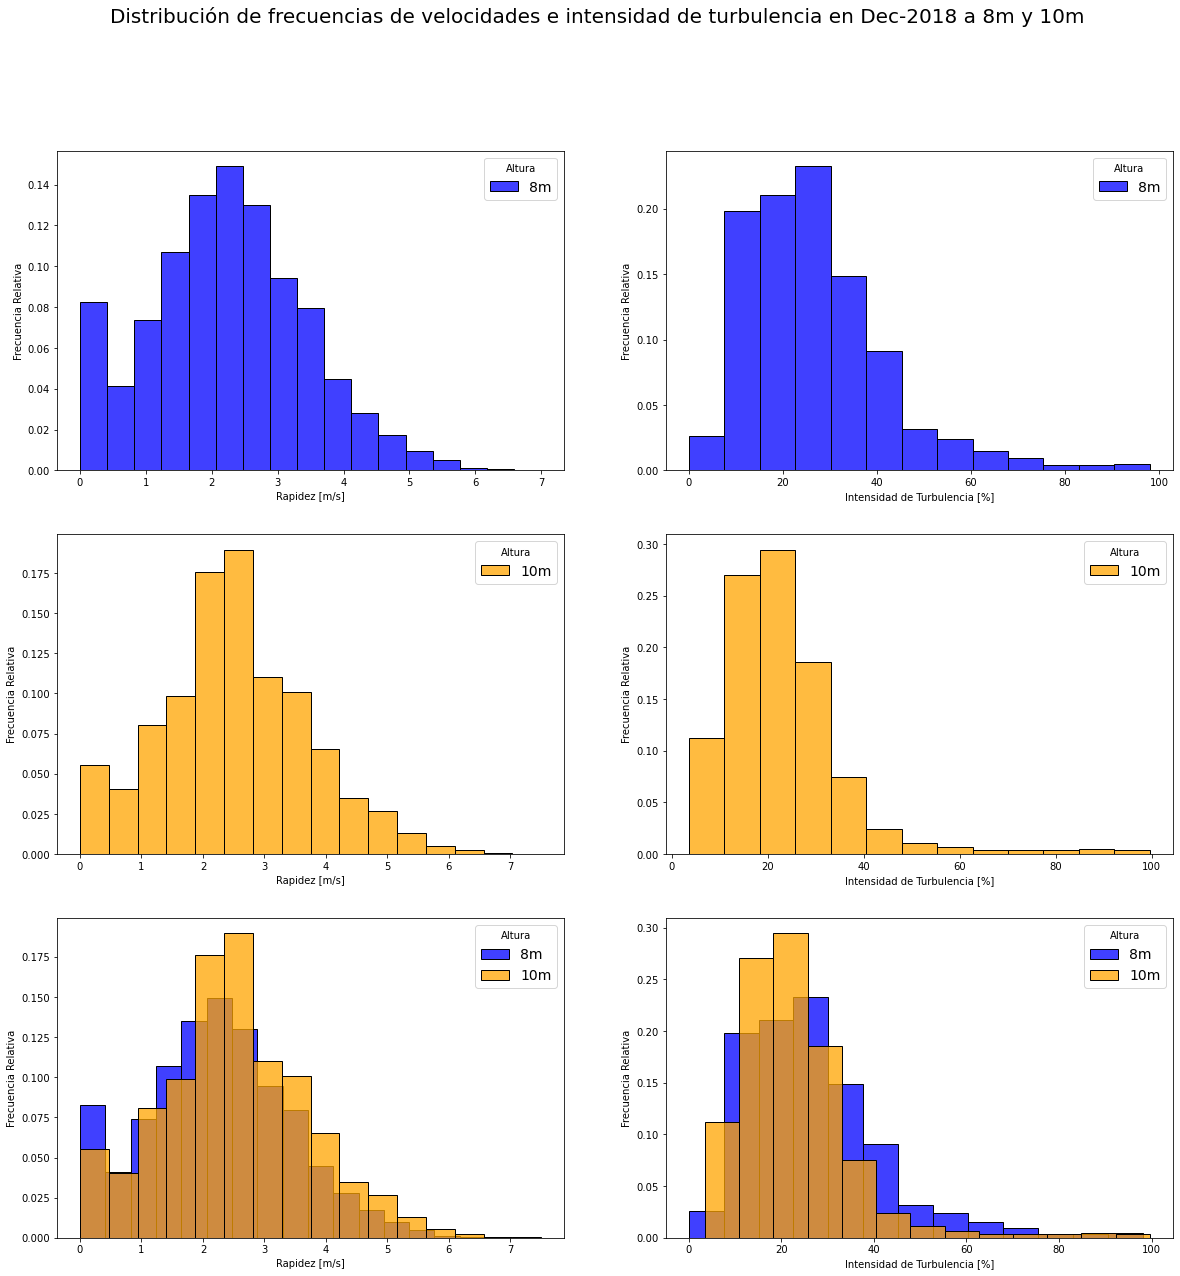

In [70]:
HistogramasViento(datos_8m,datos_10m,12,2018)

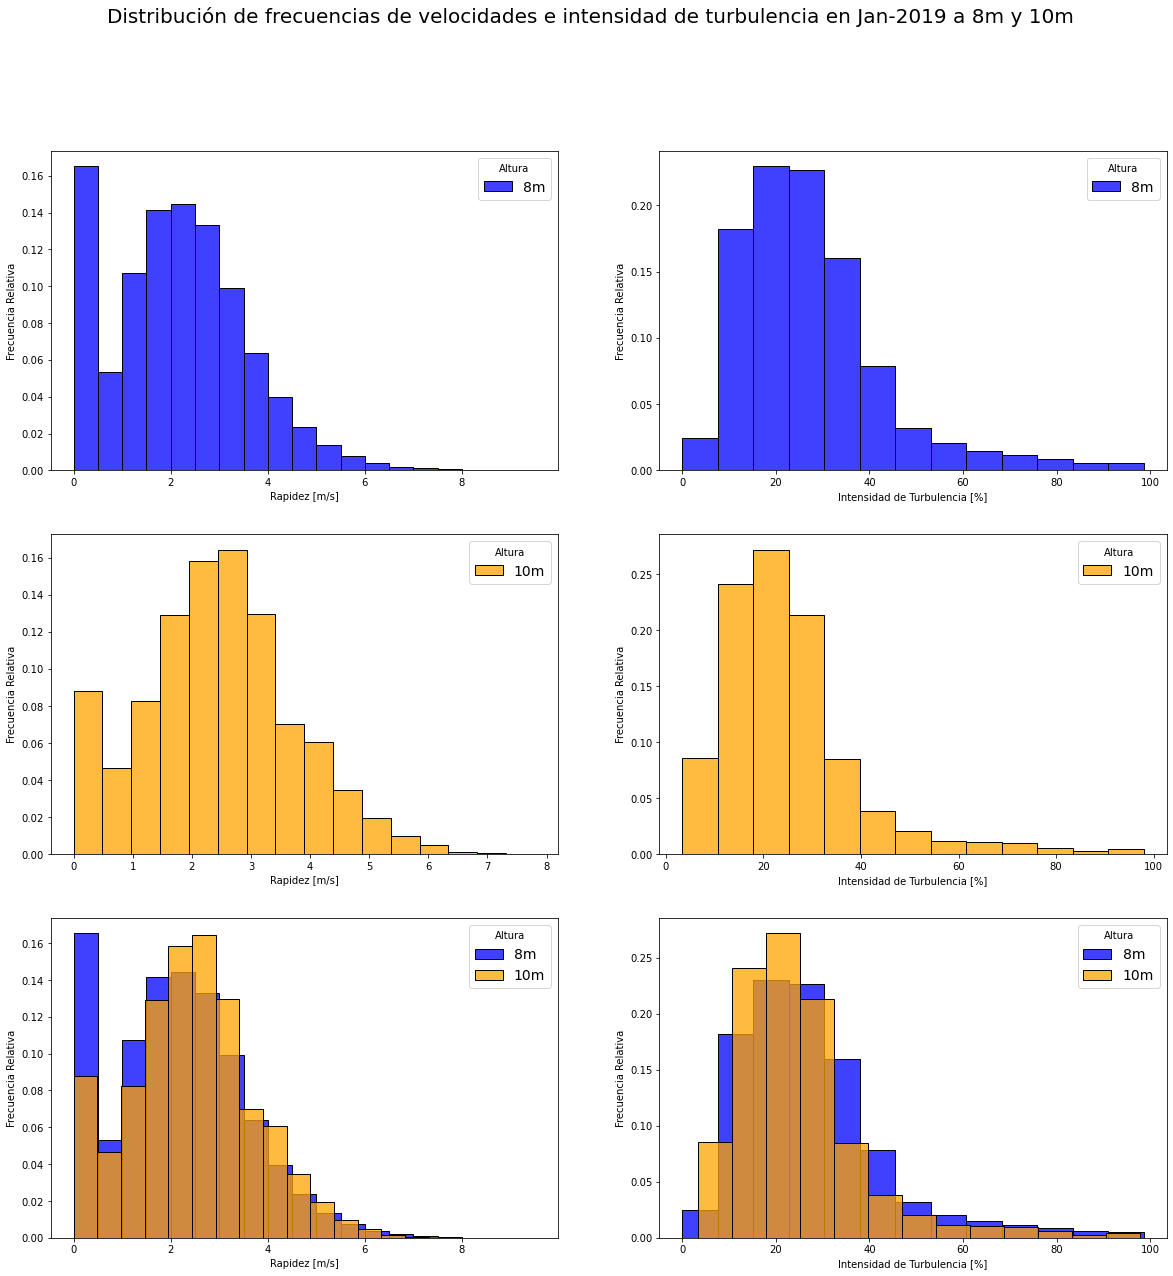

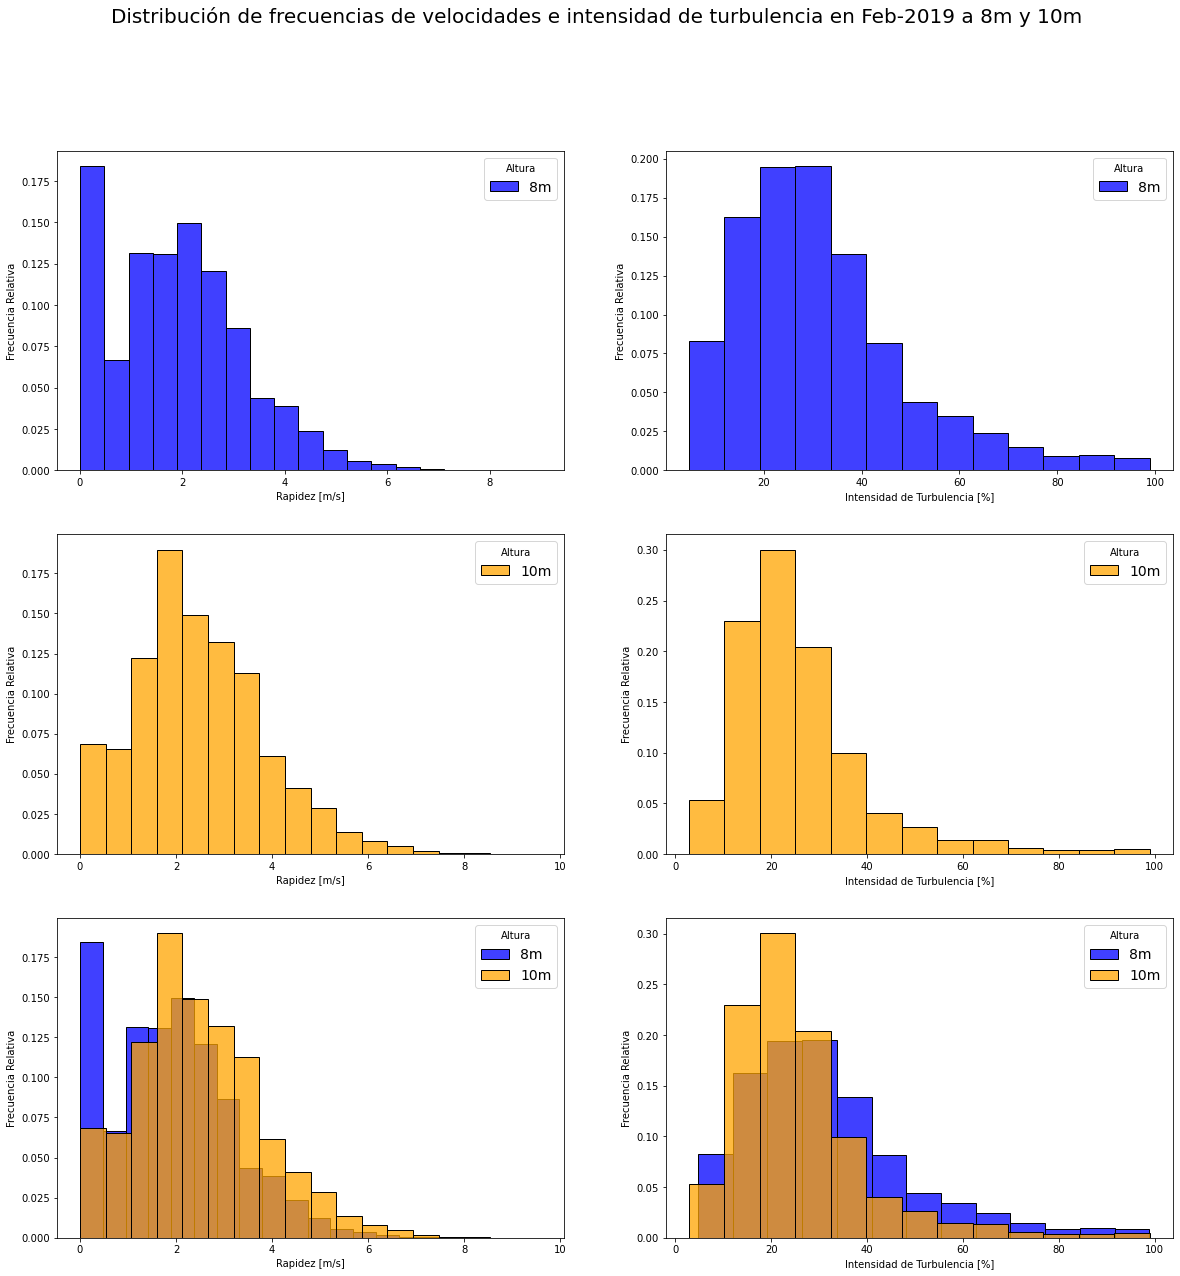

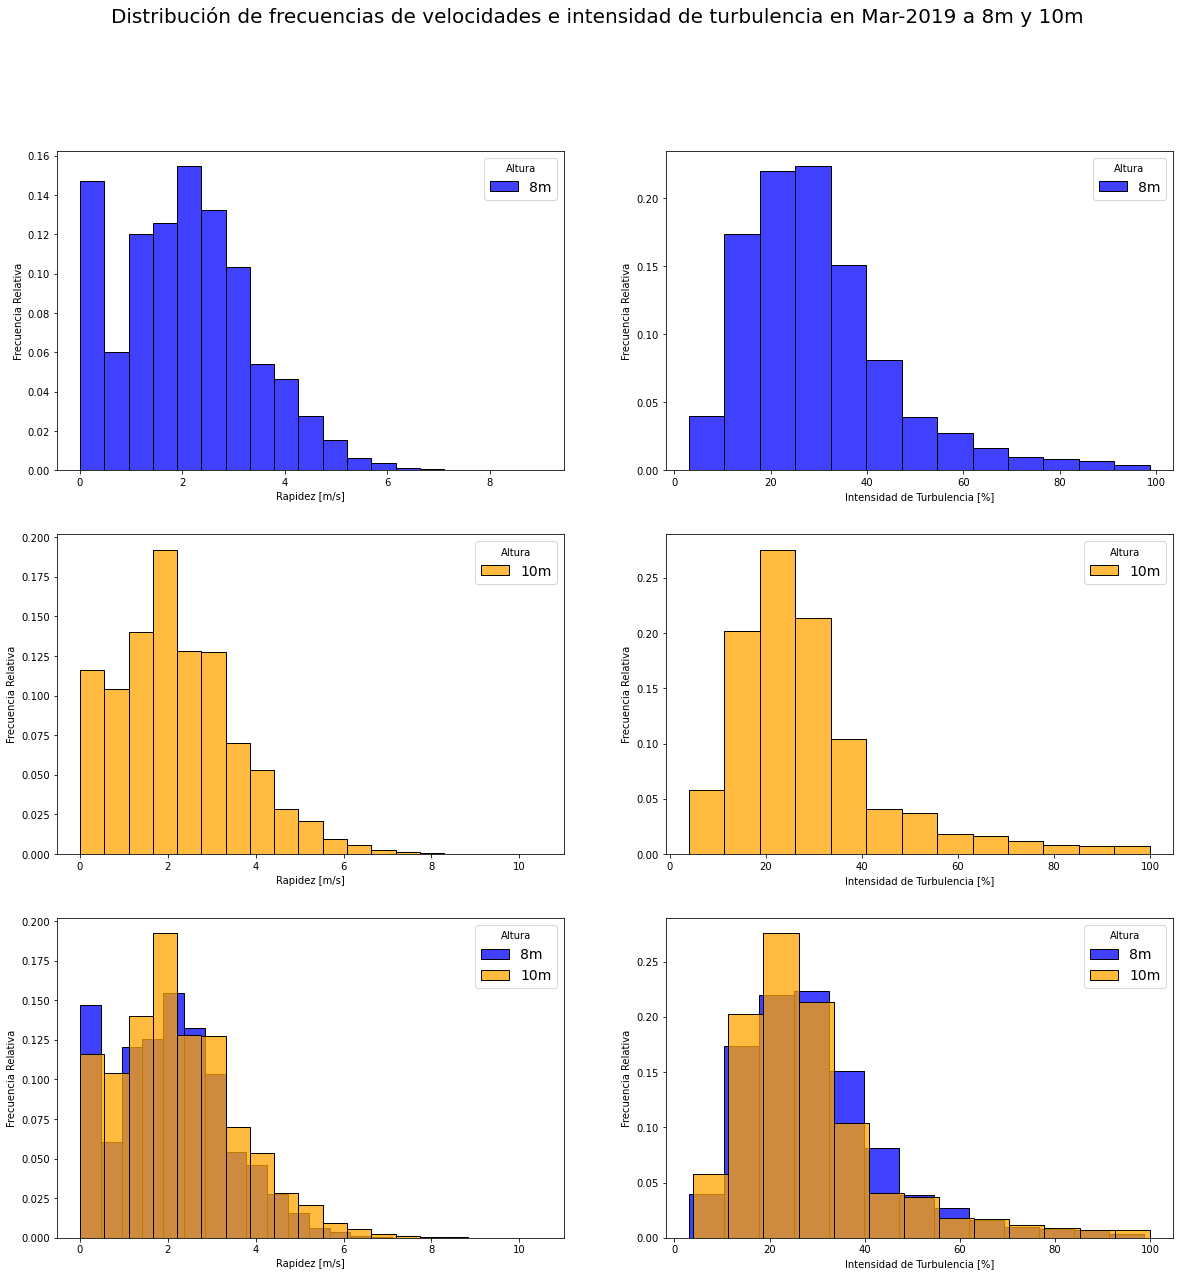

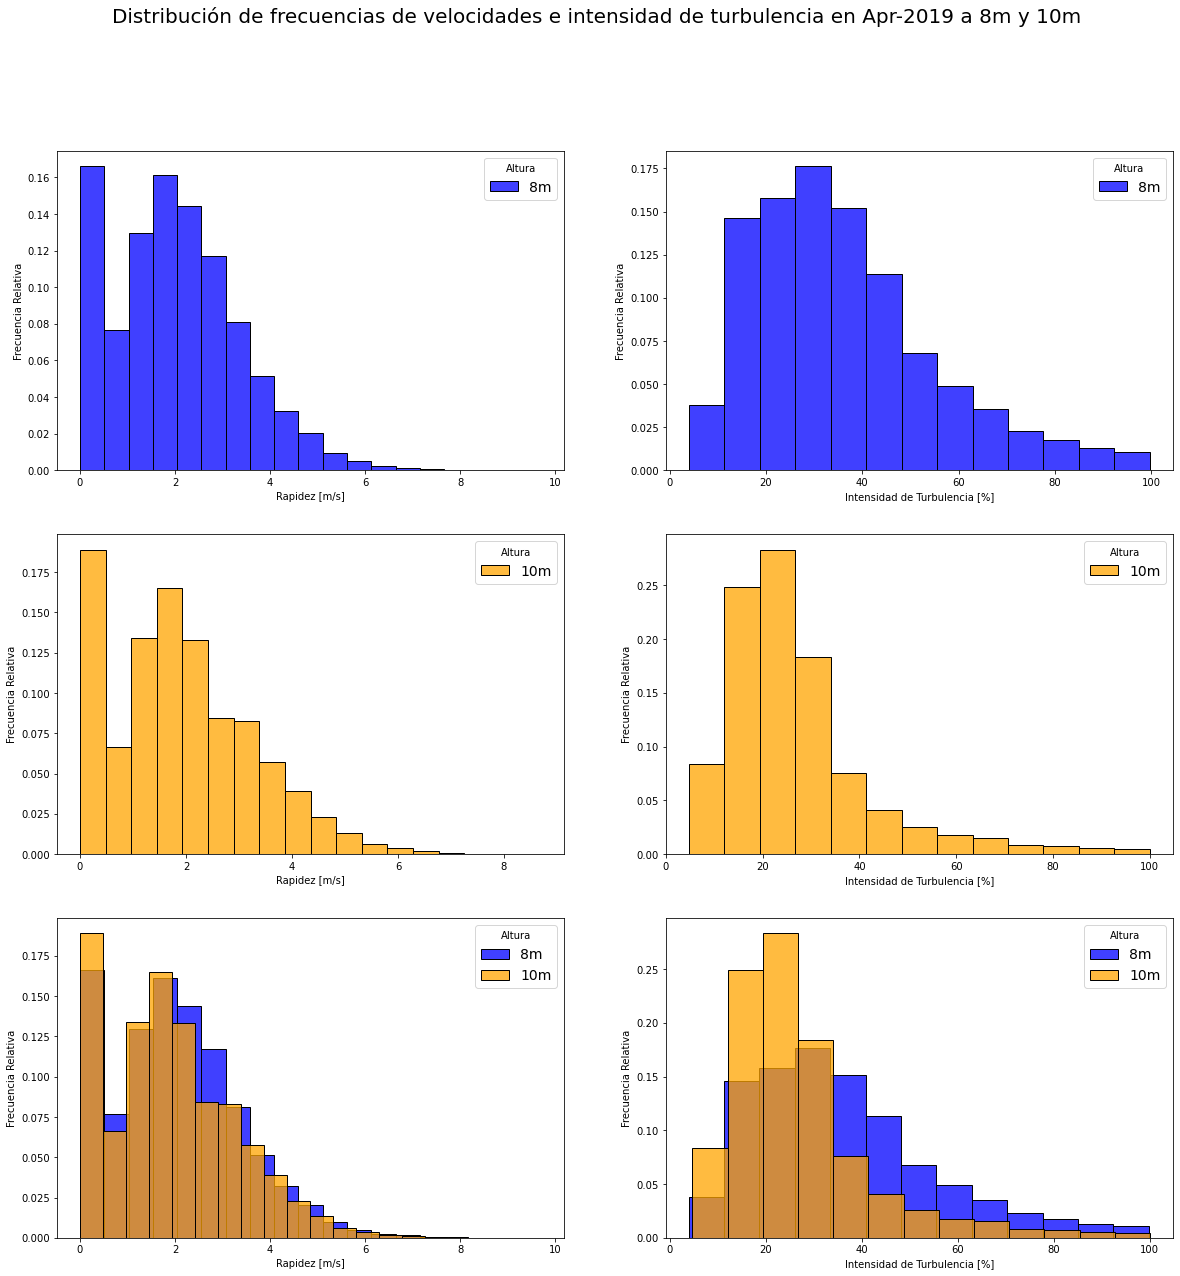

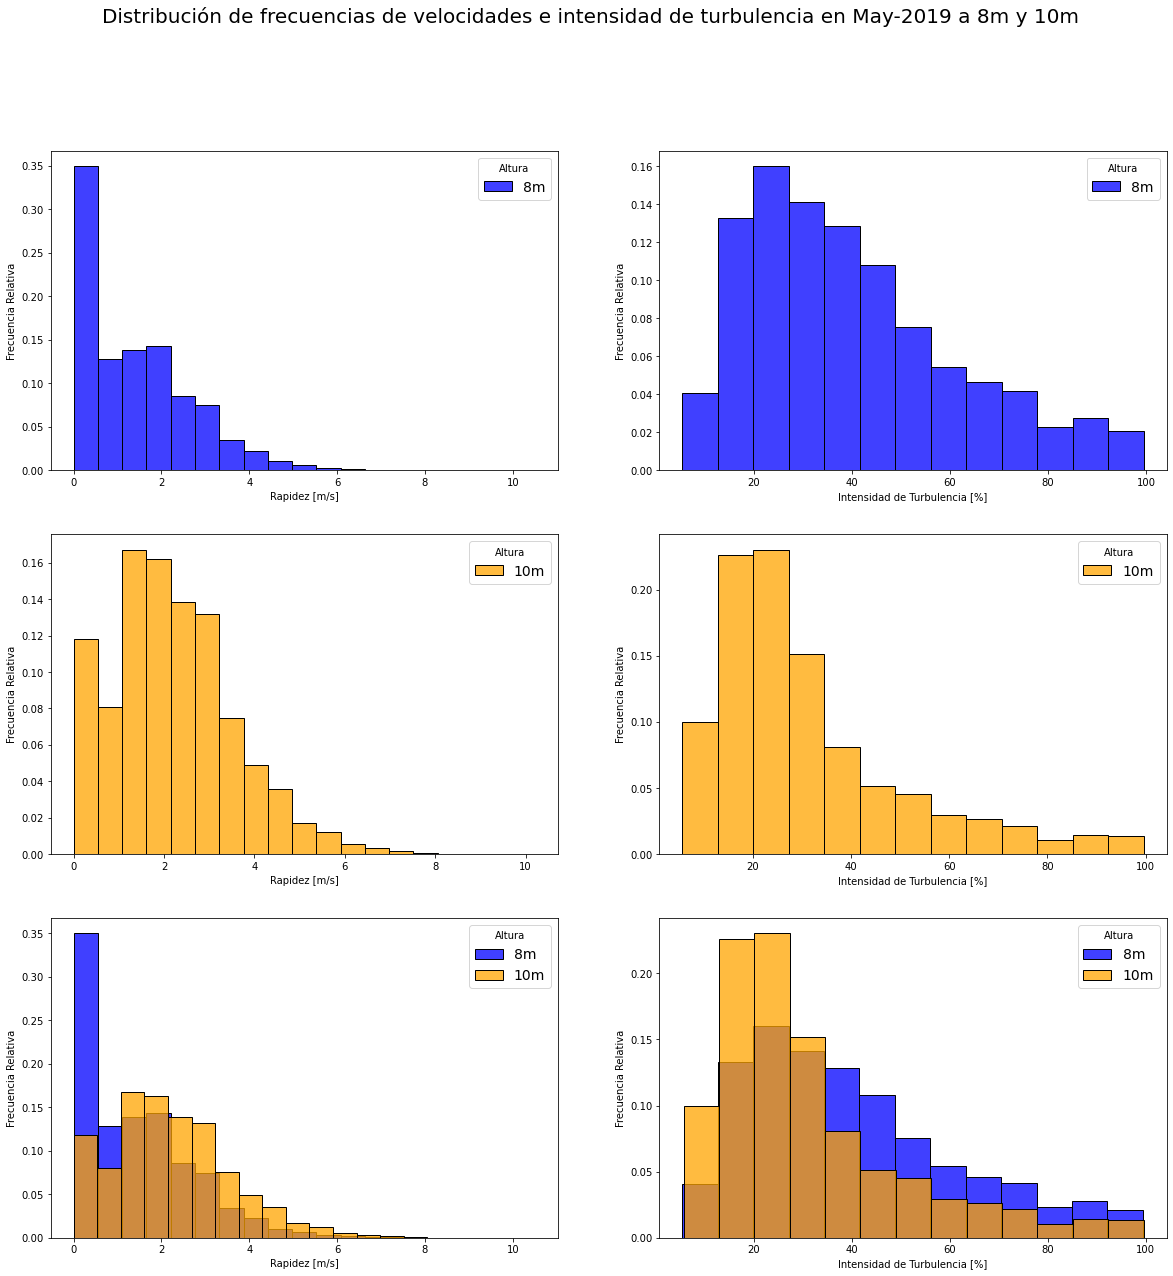

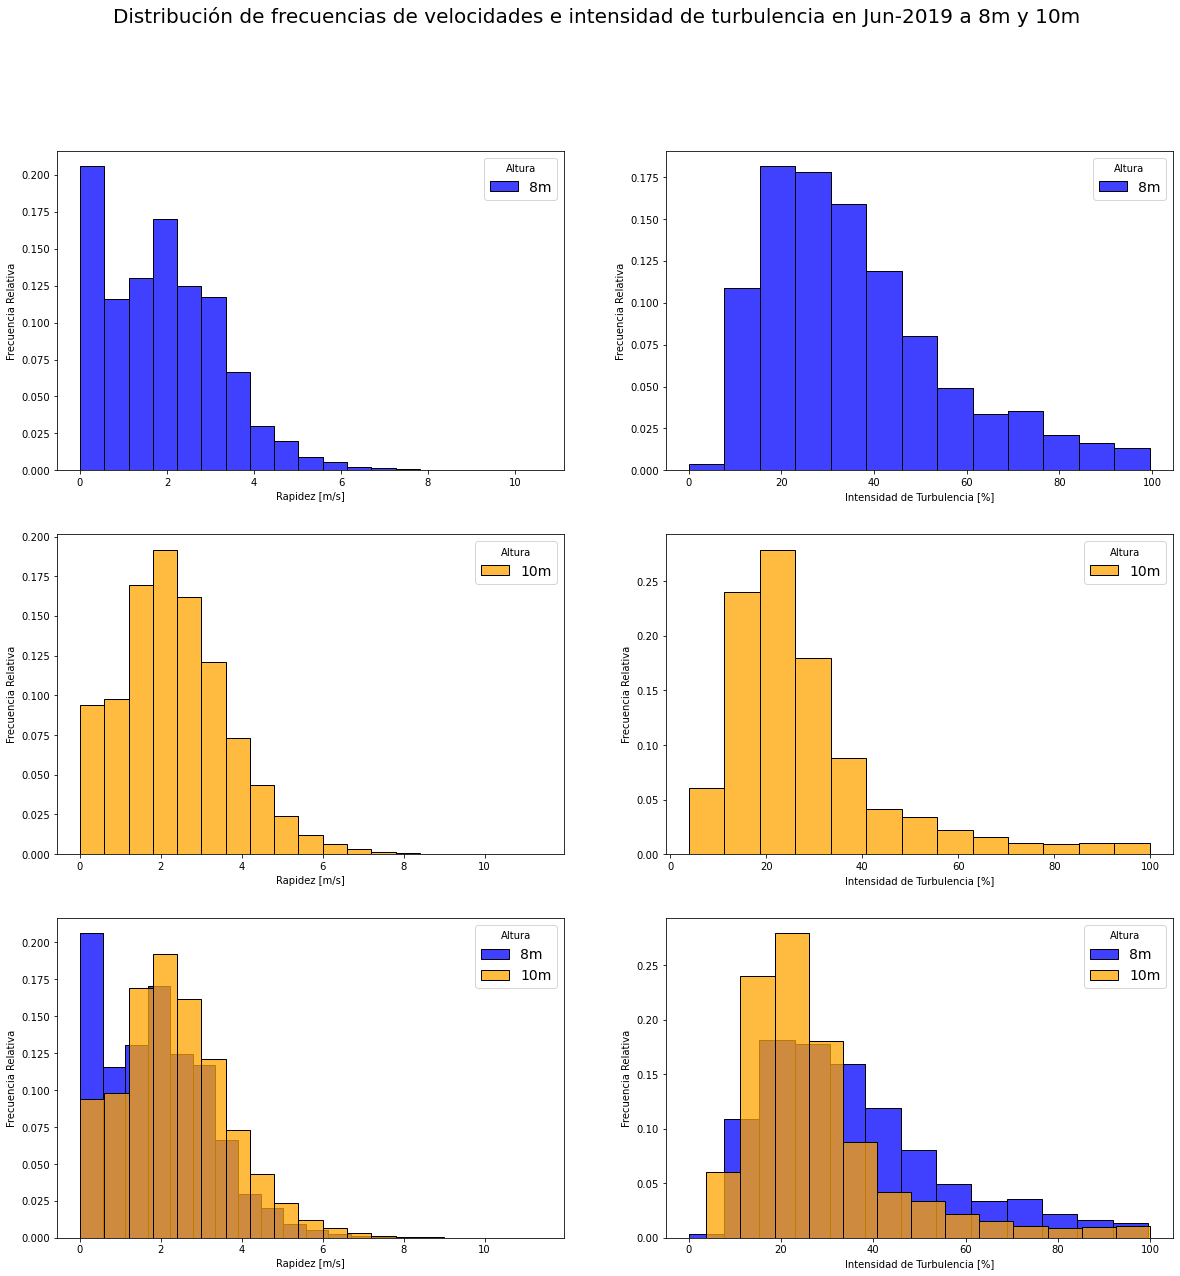

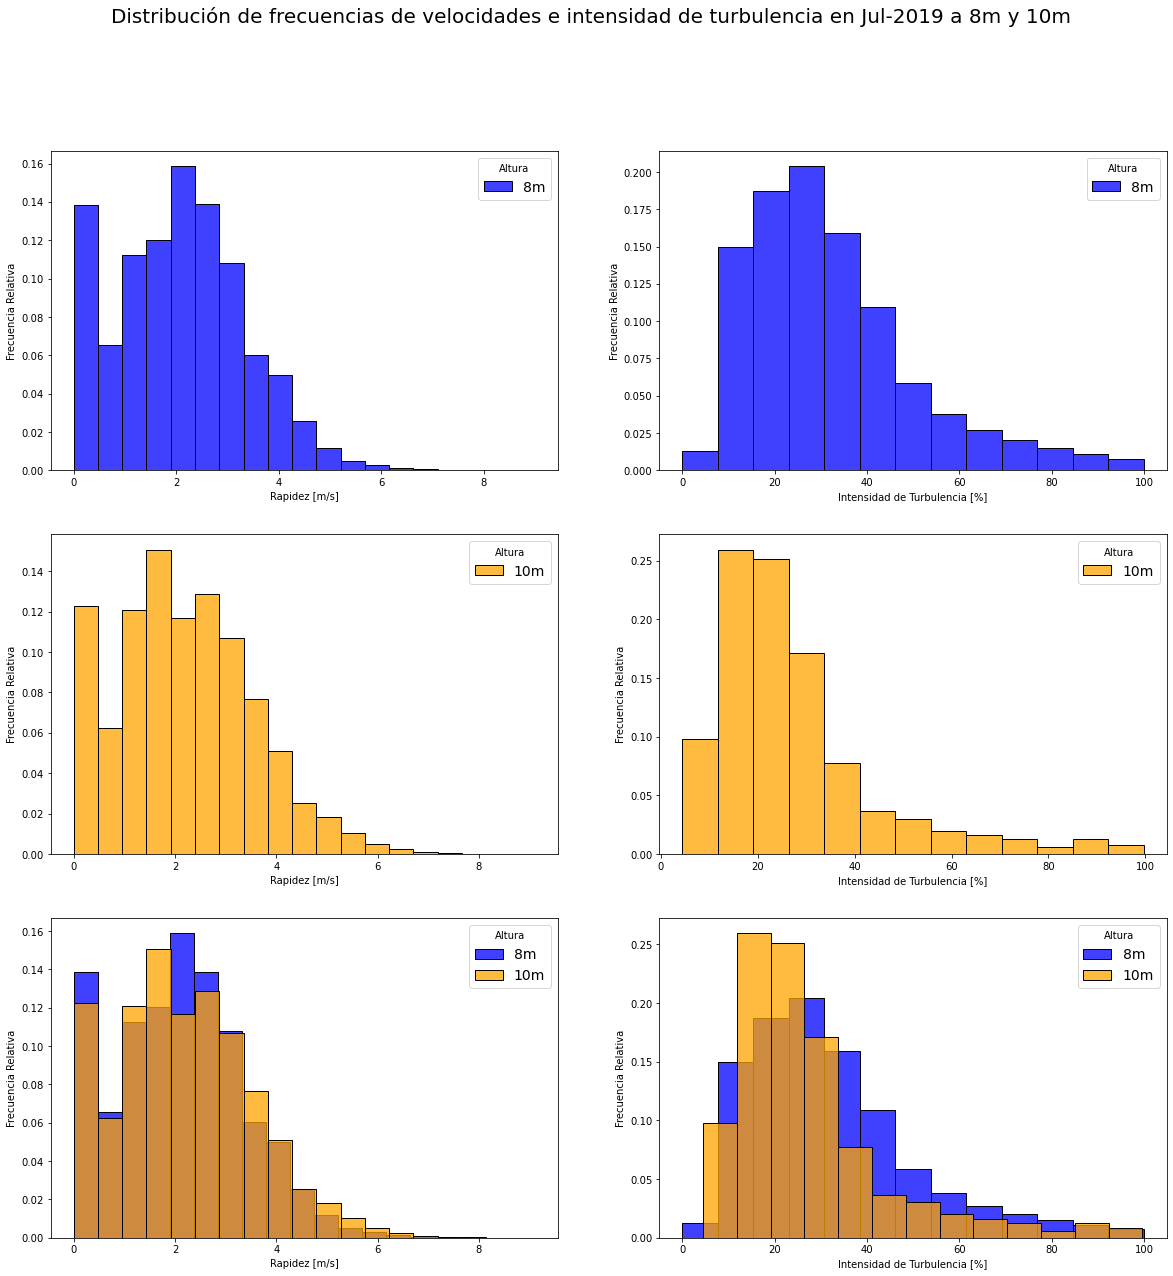

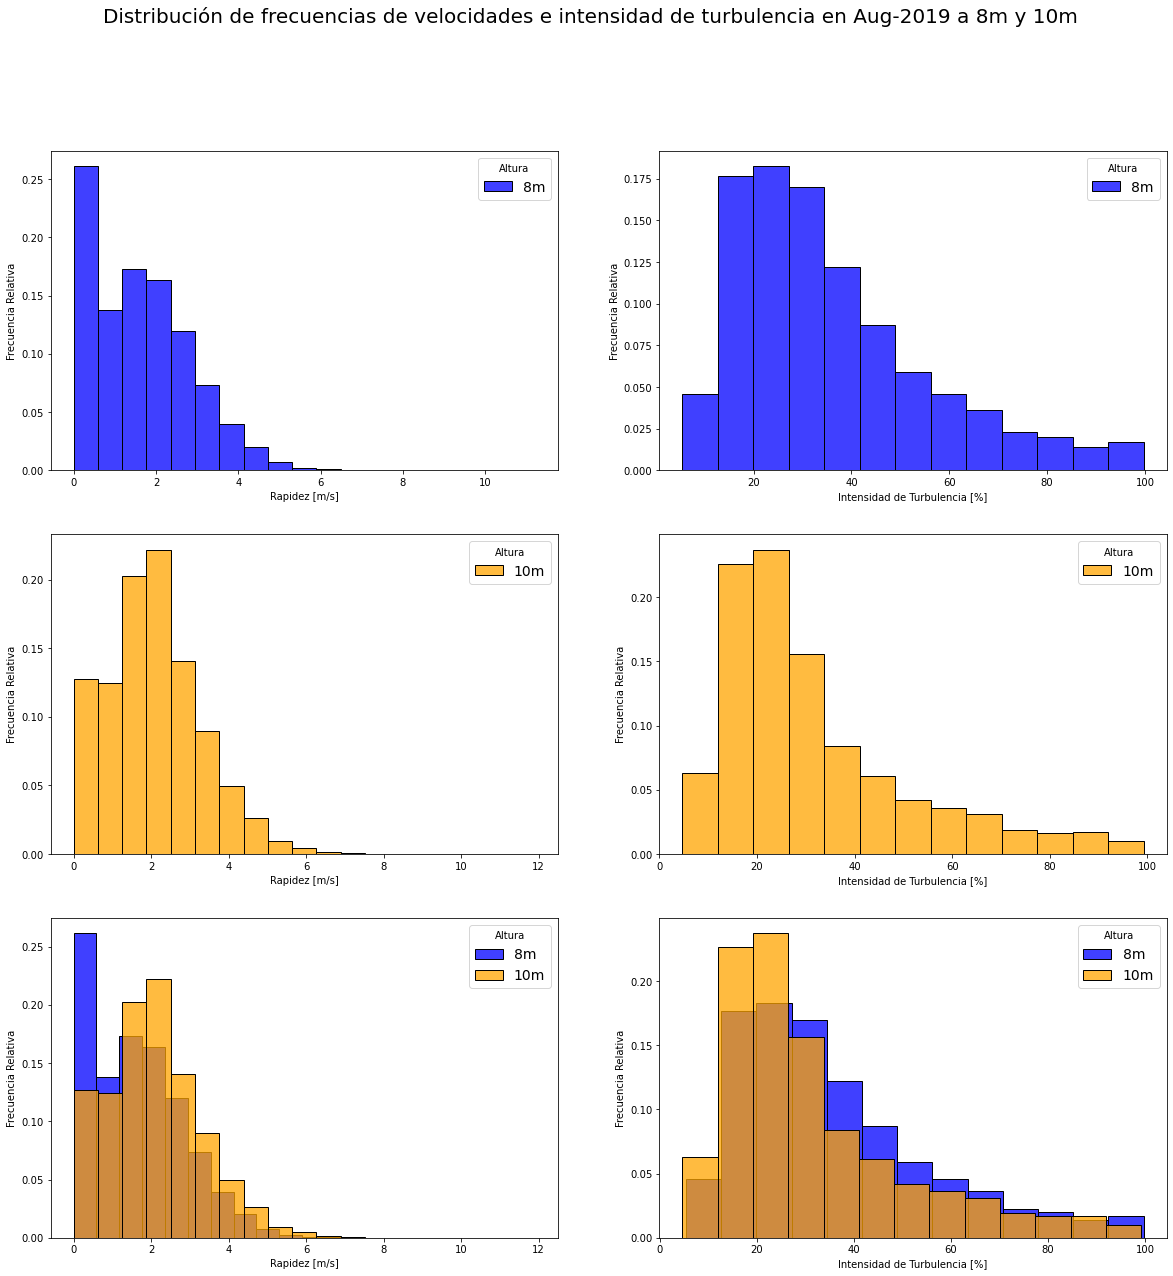

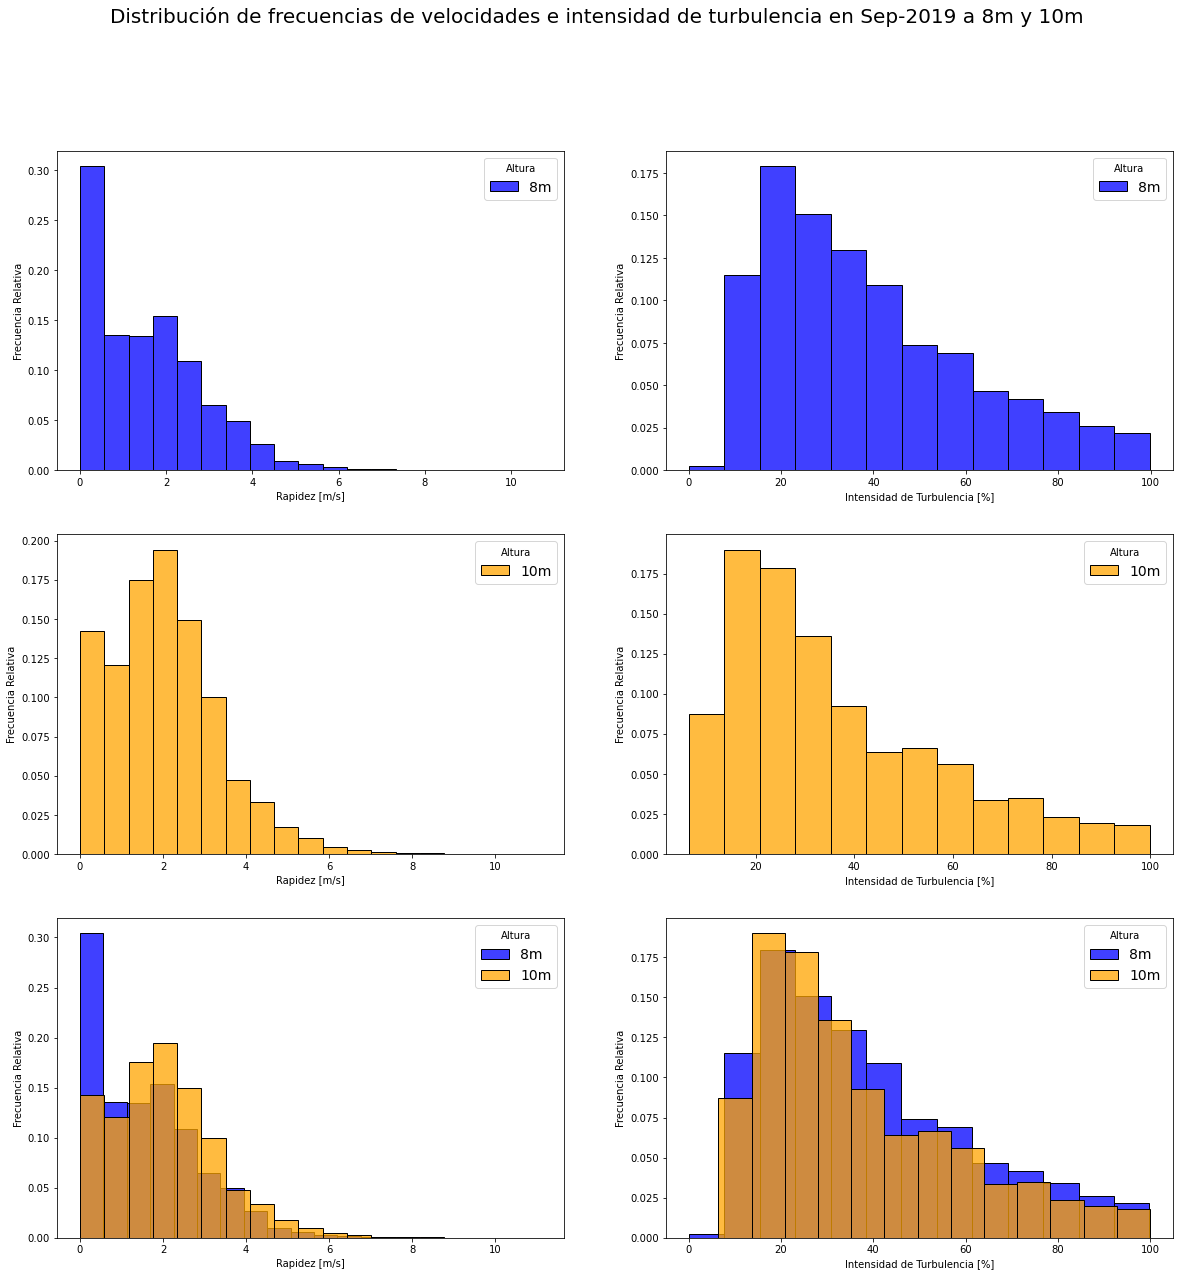

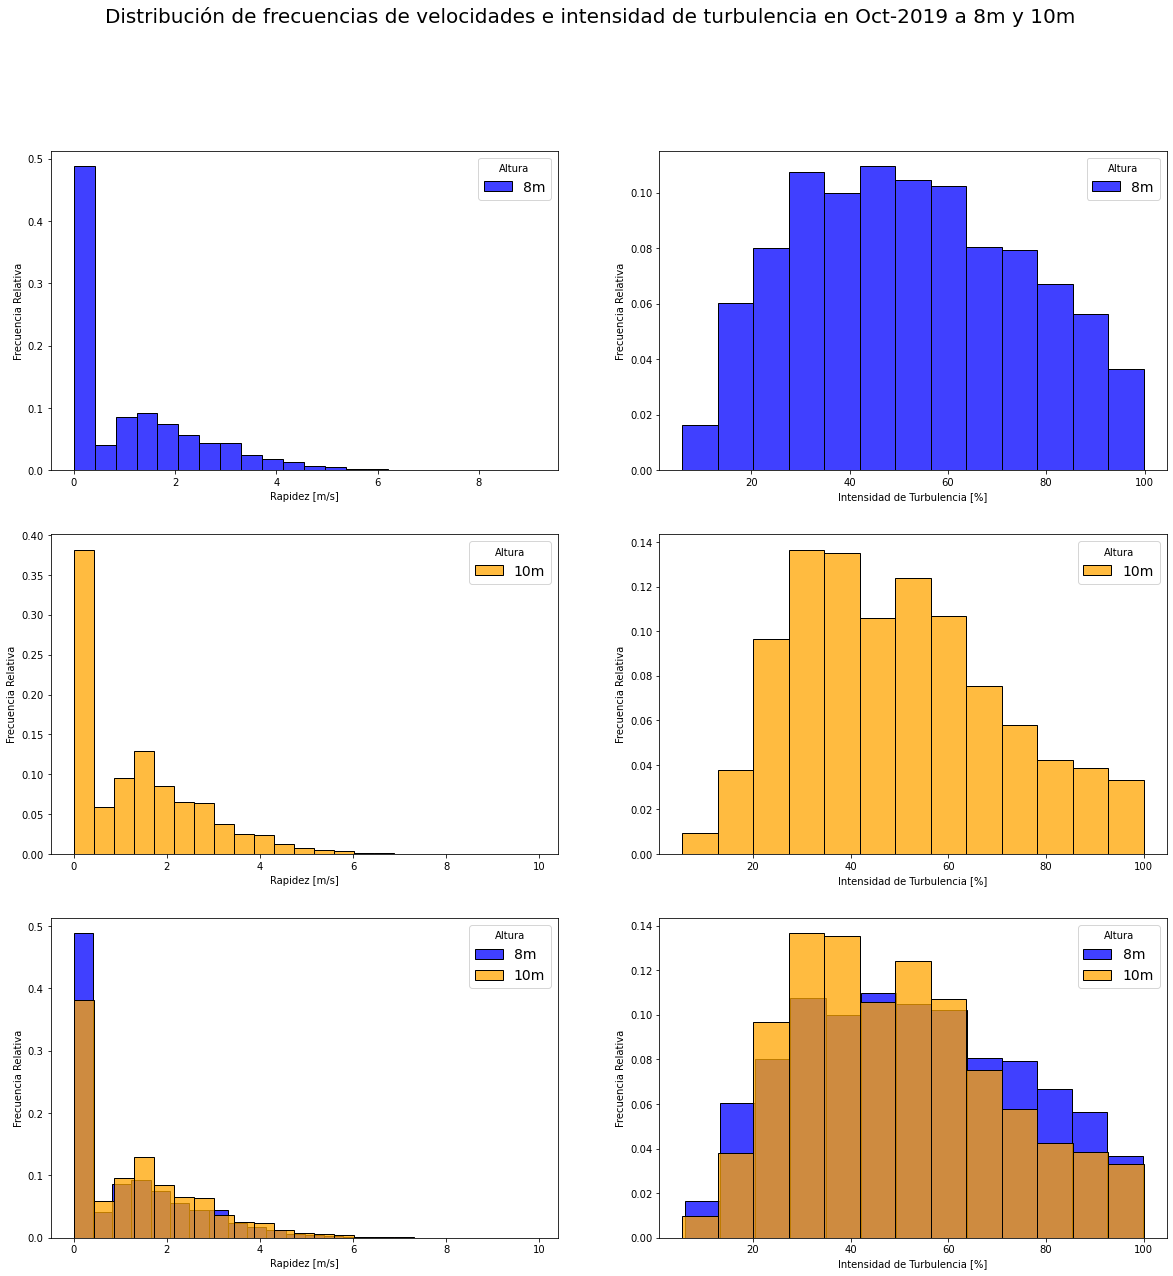

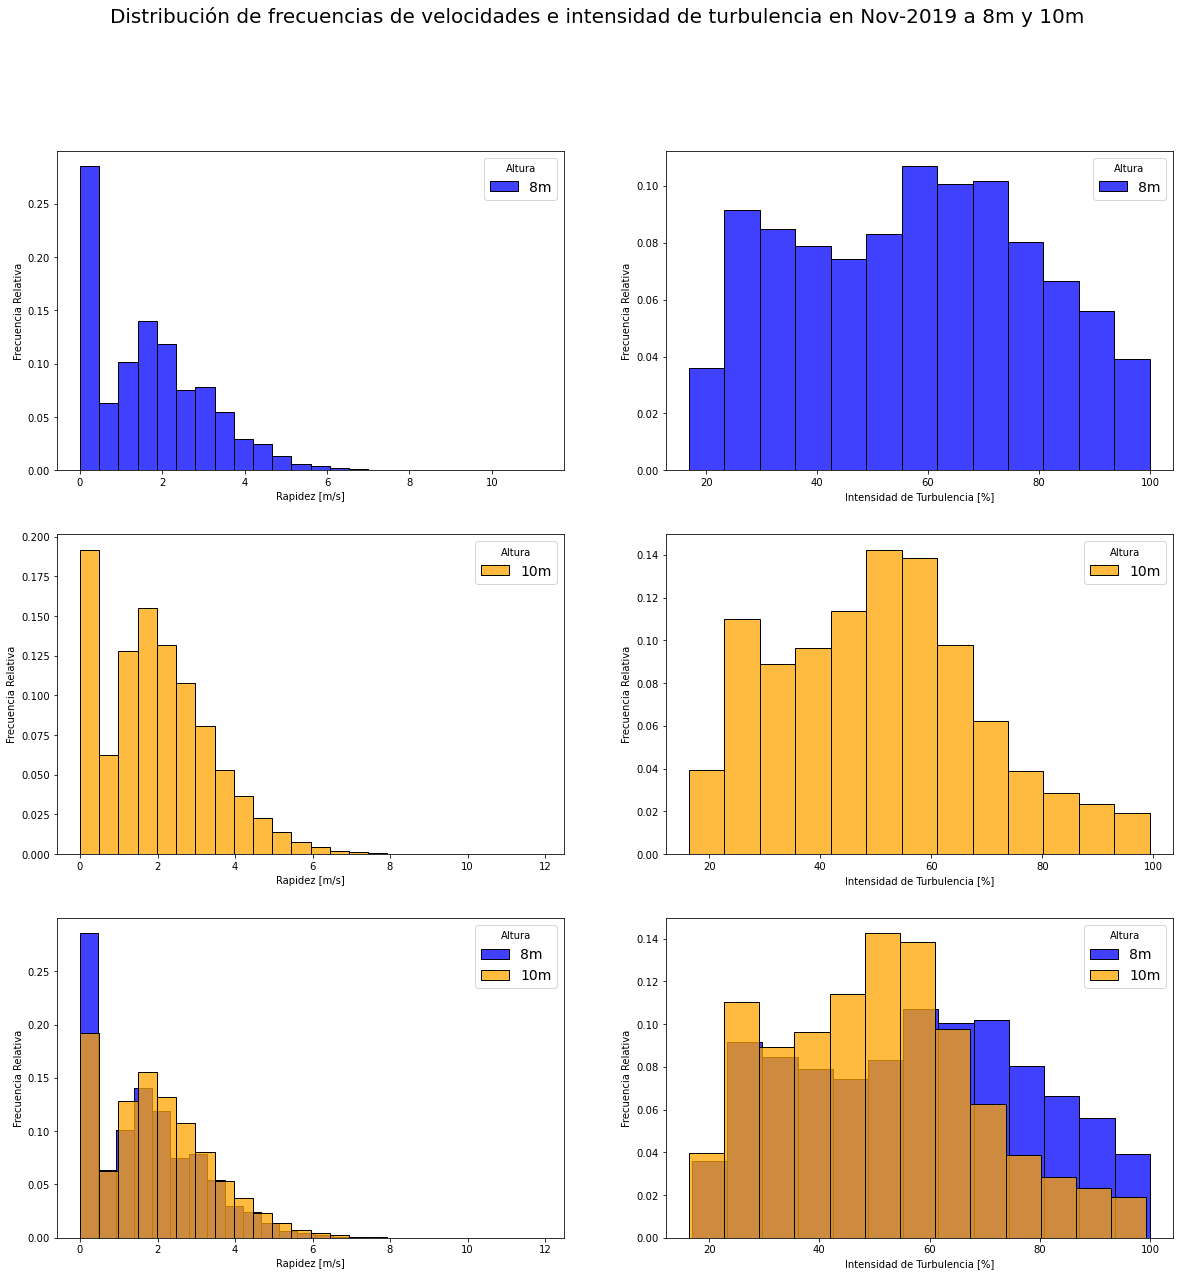

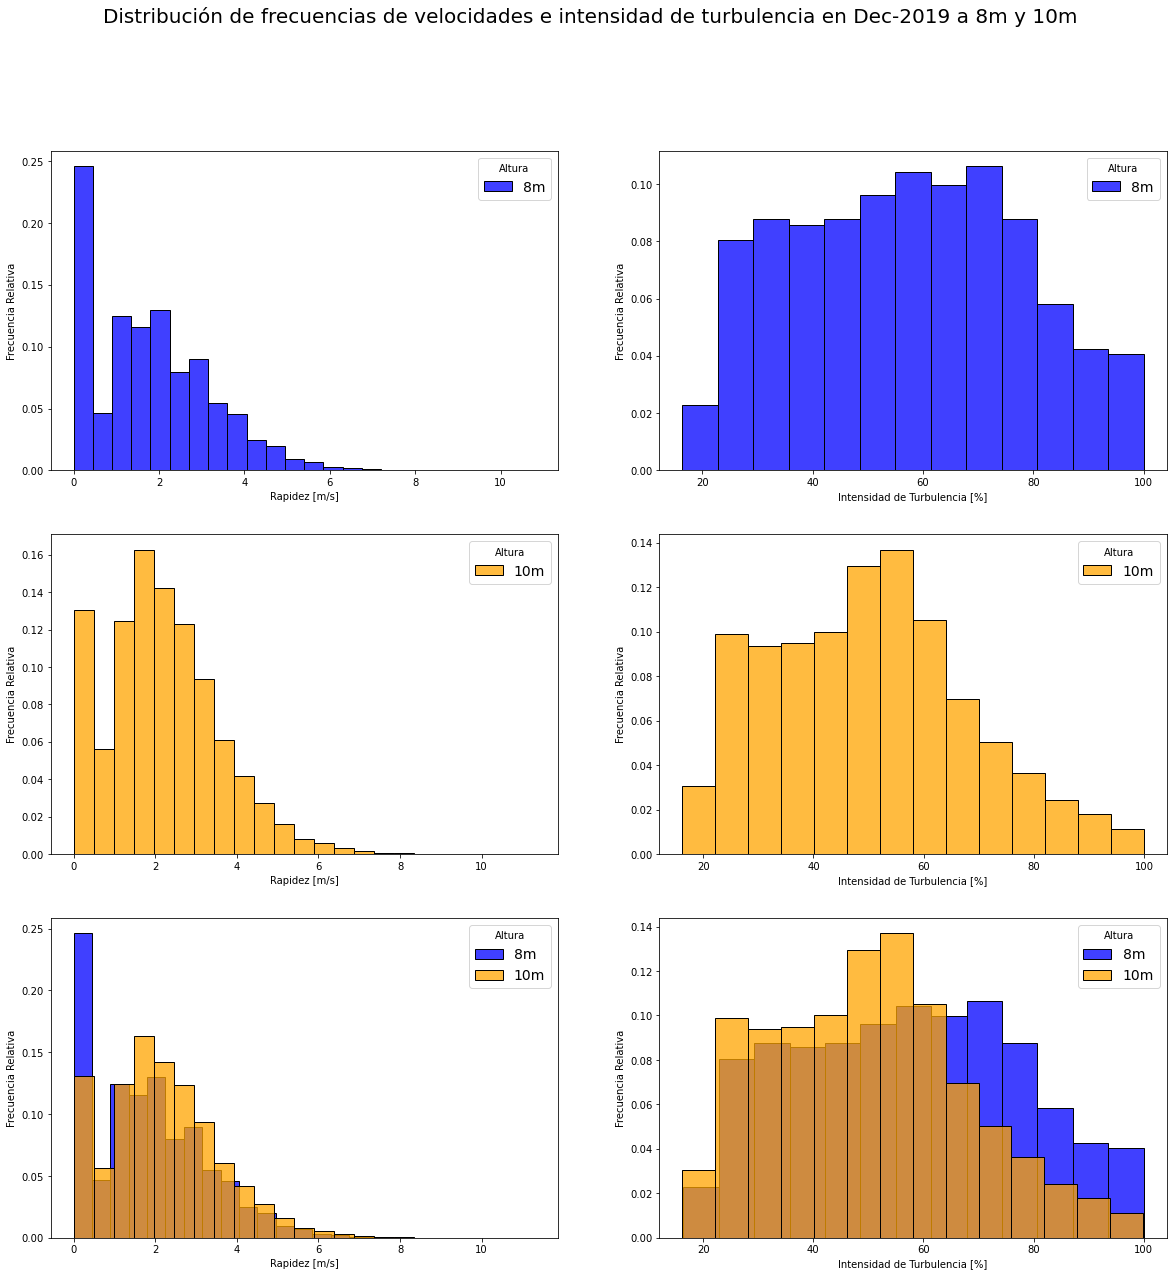

In [71]:
for i in range(1,13):
    HistogramasViento(datos_8m,datos_10m,i,2019)

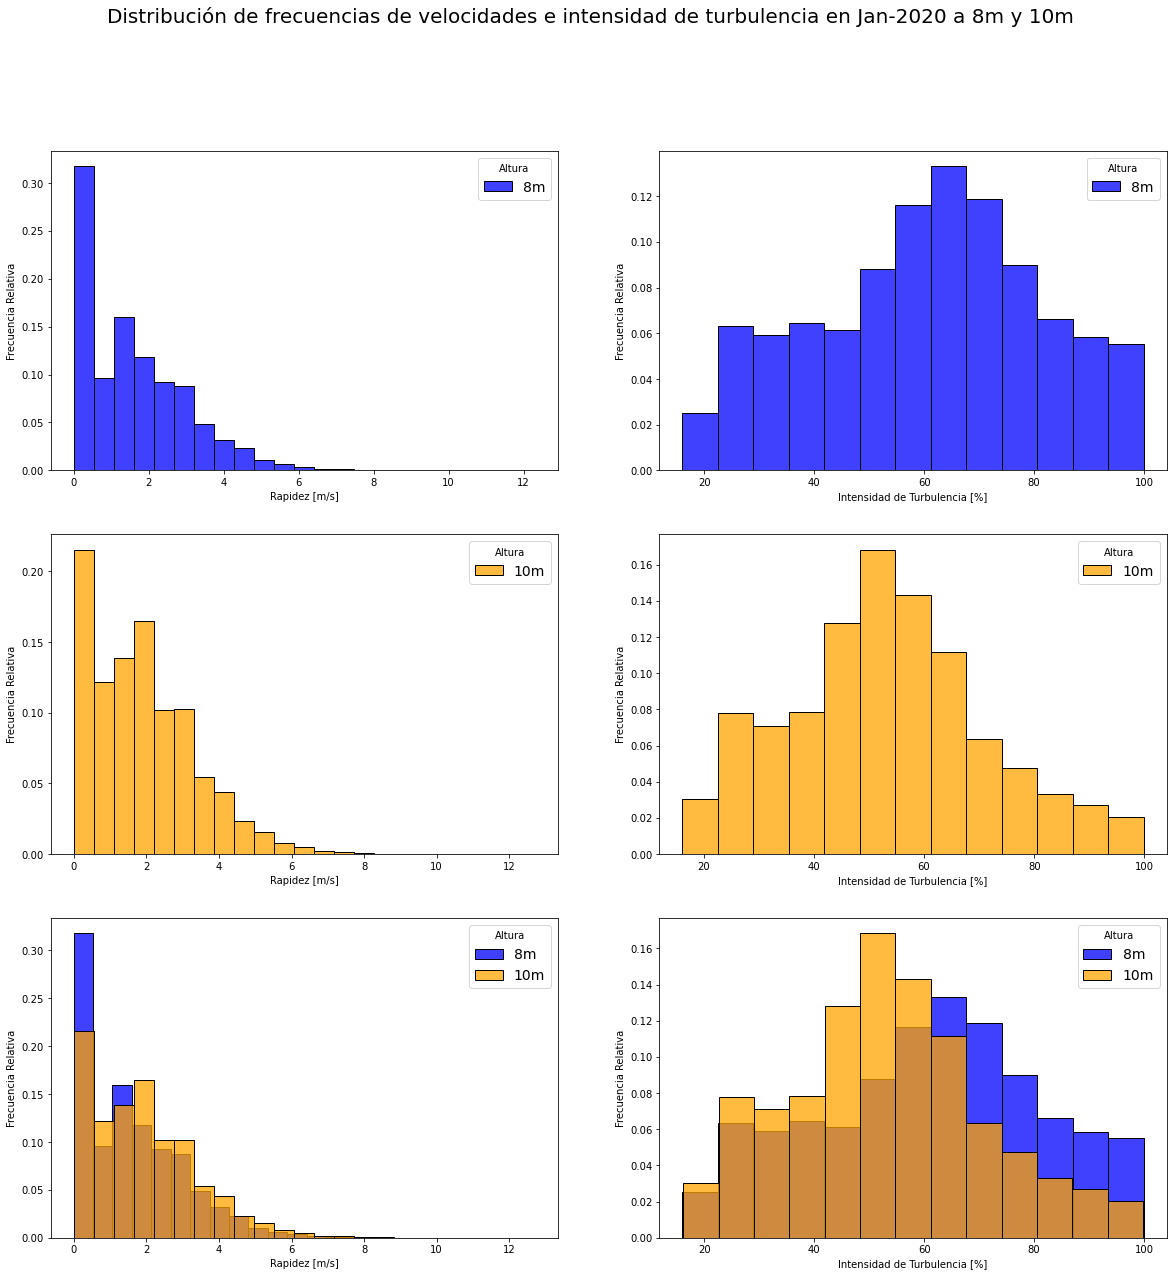

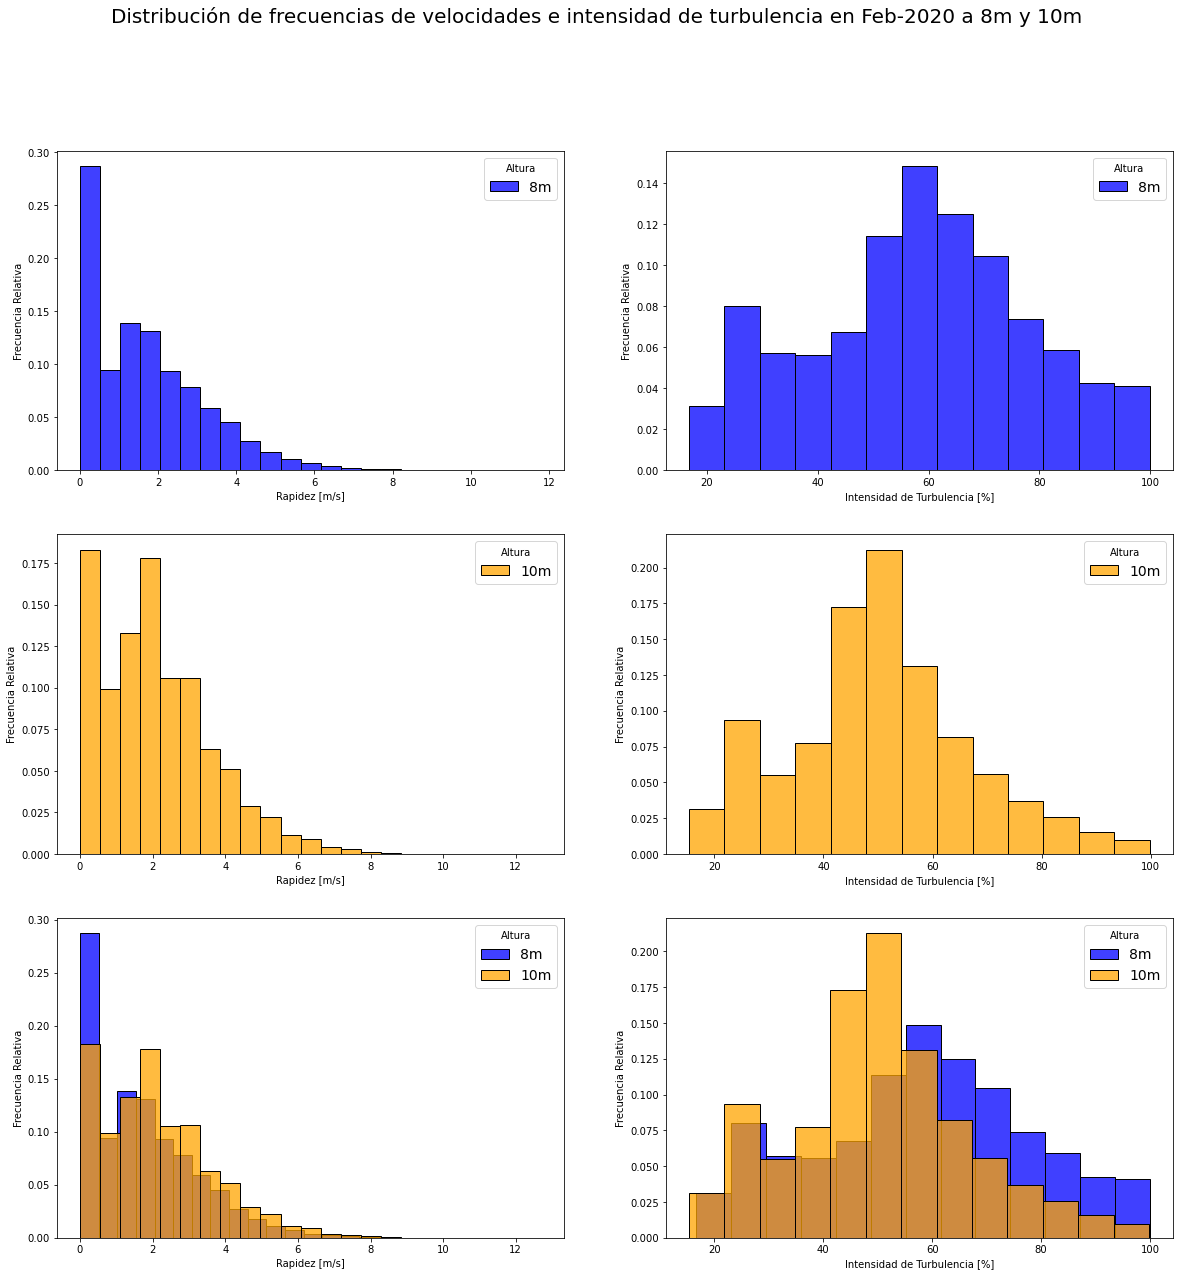

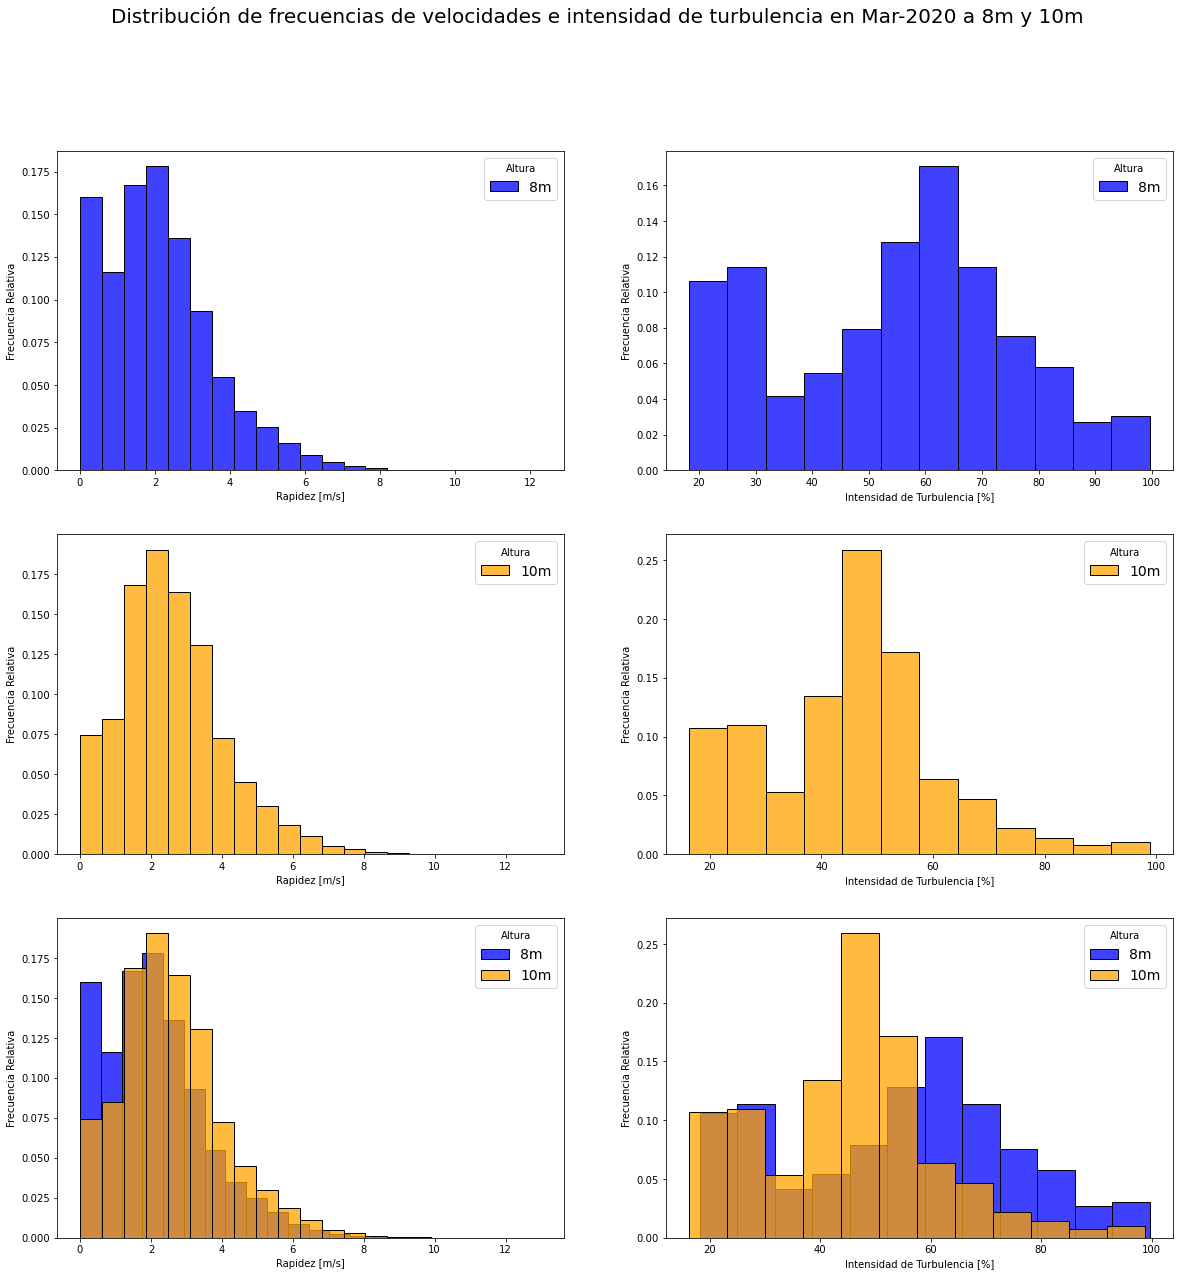

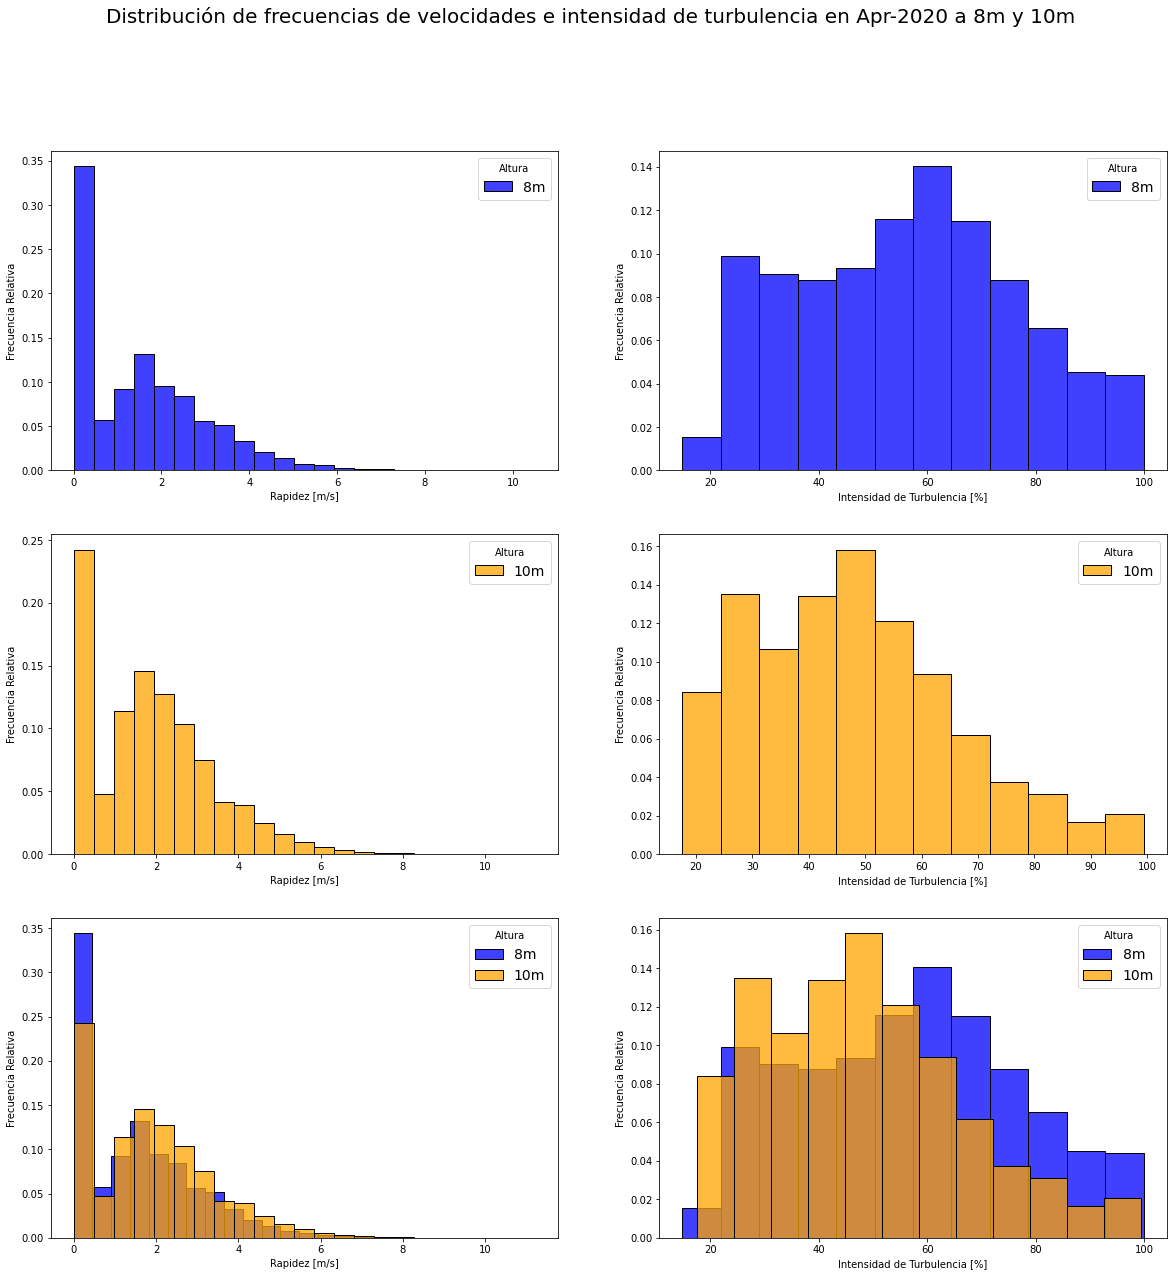

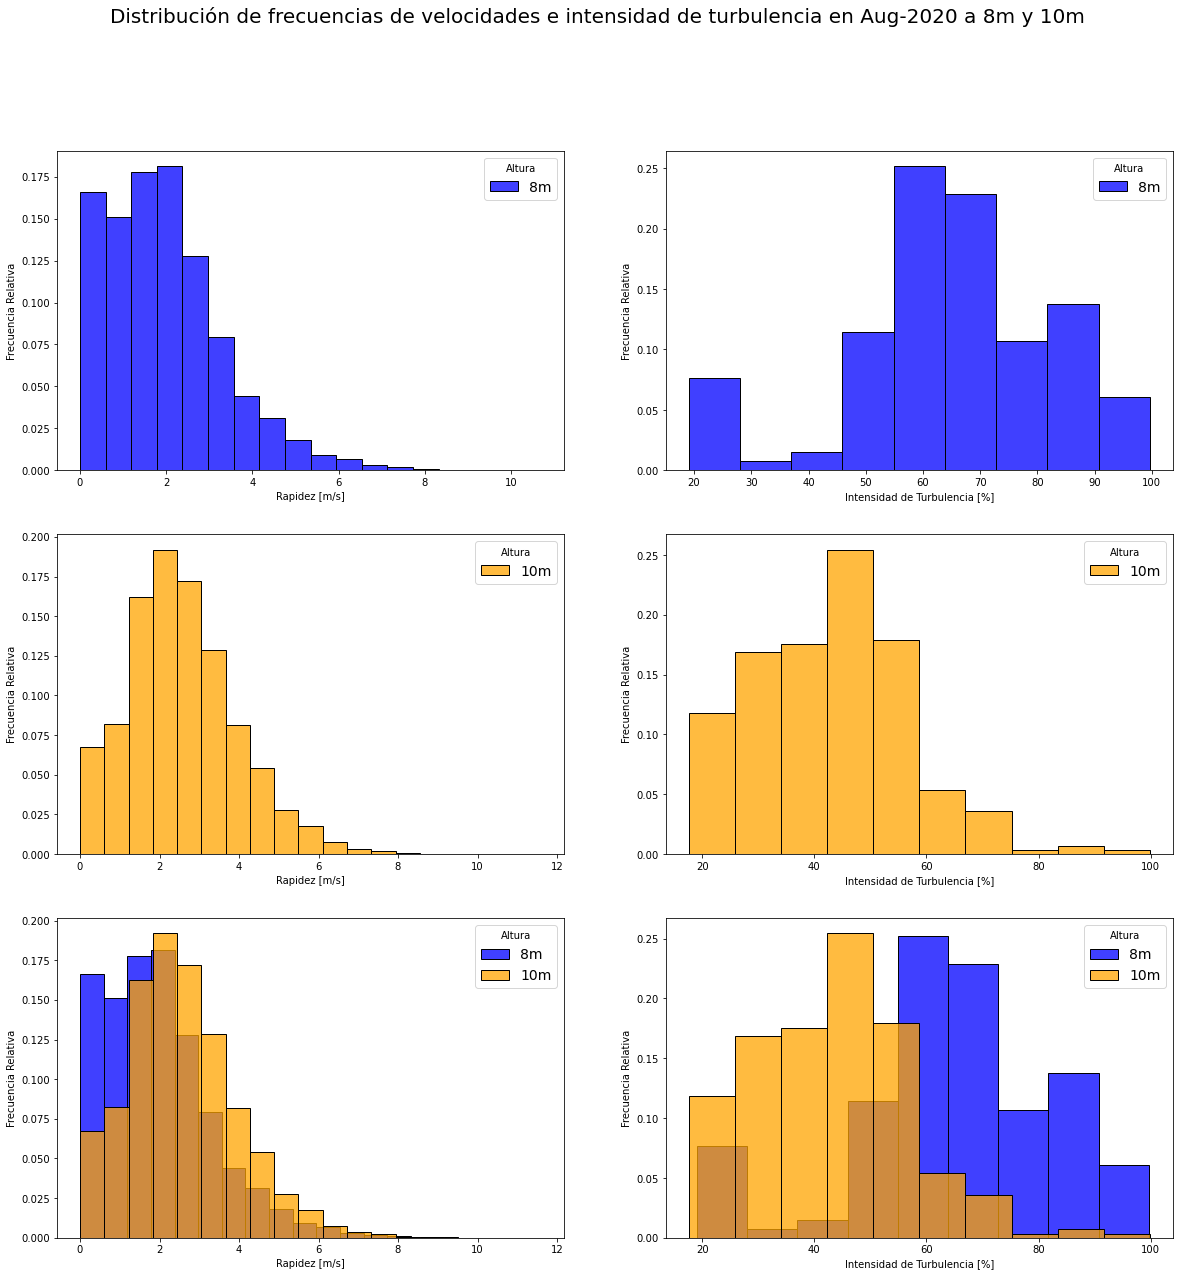

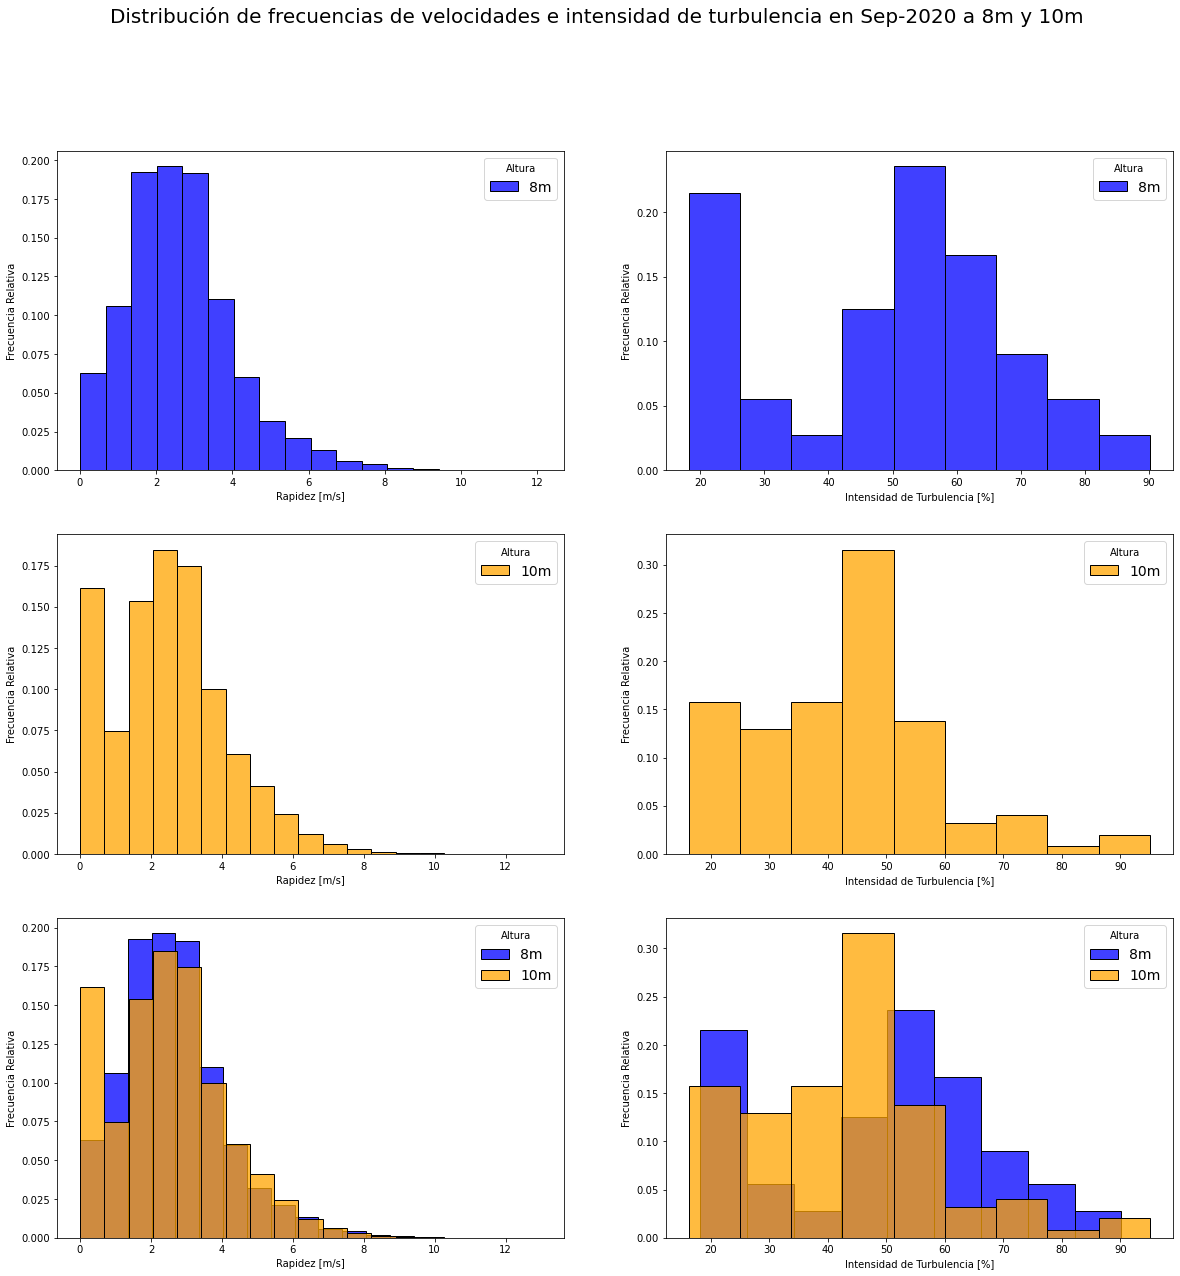

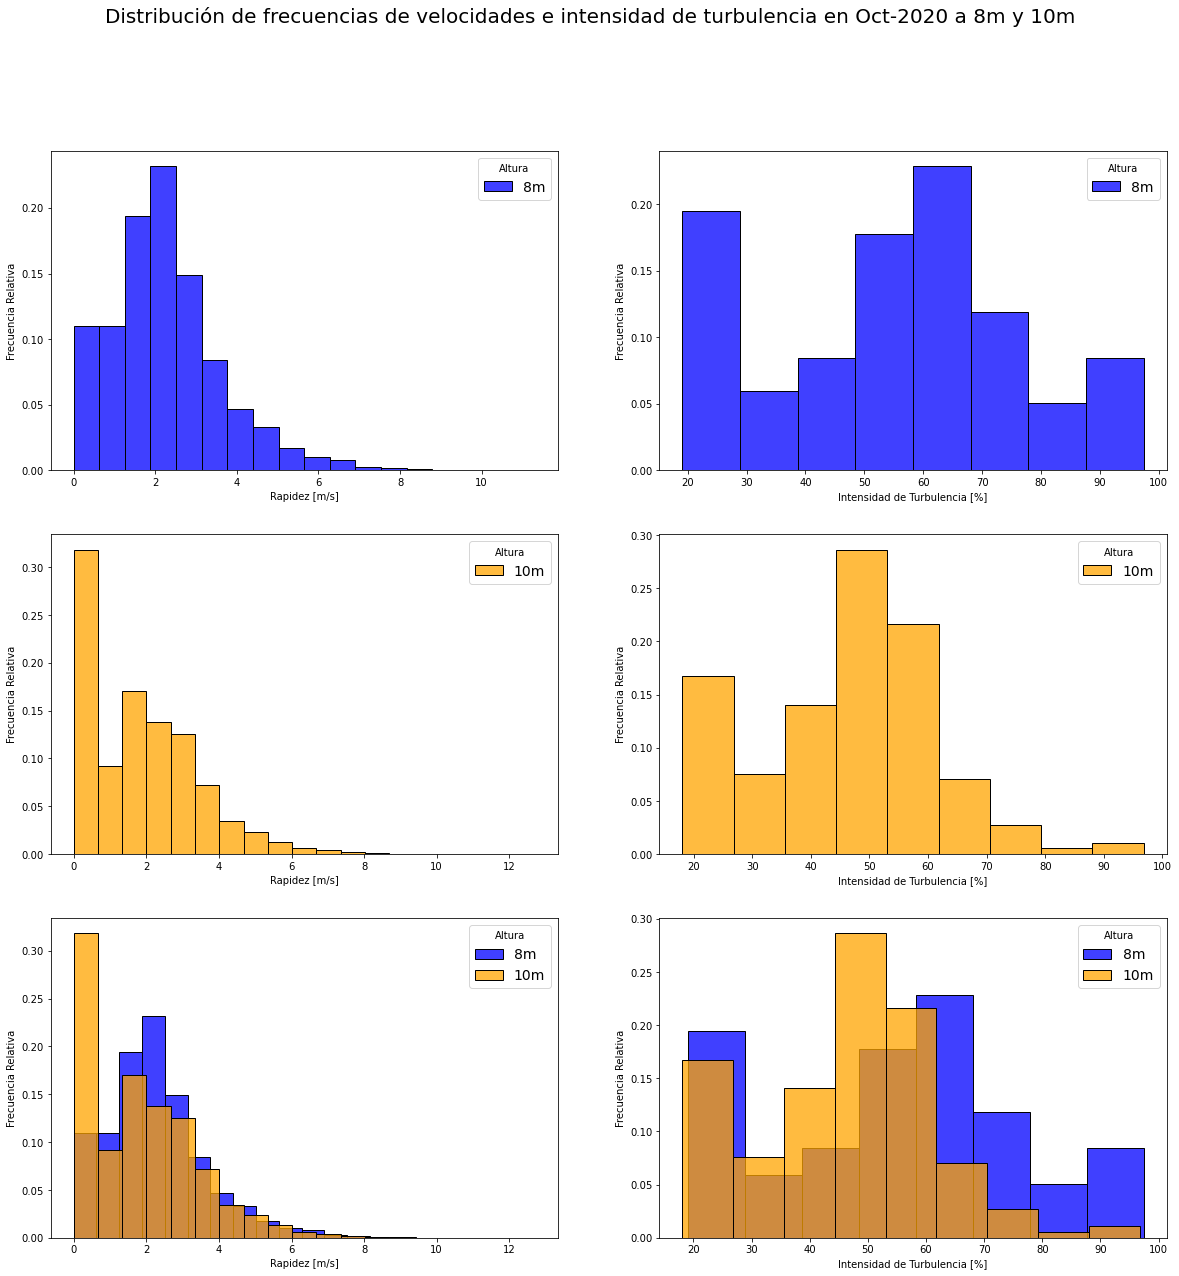

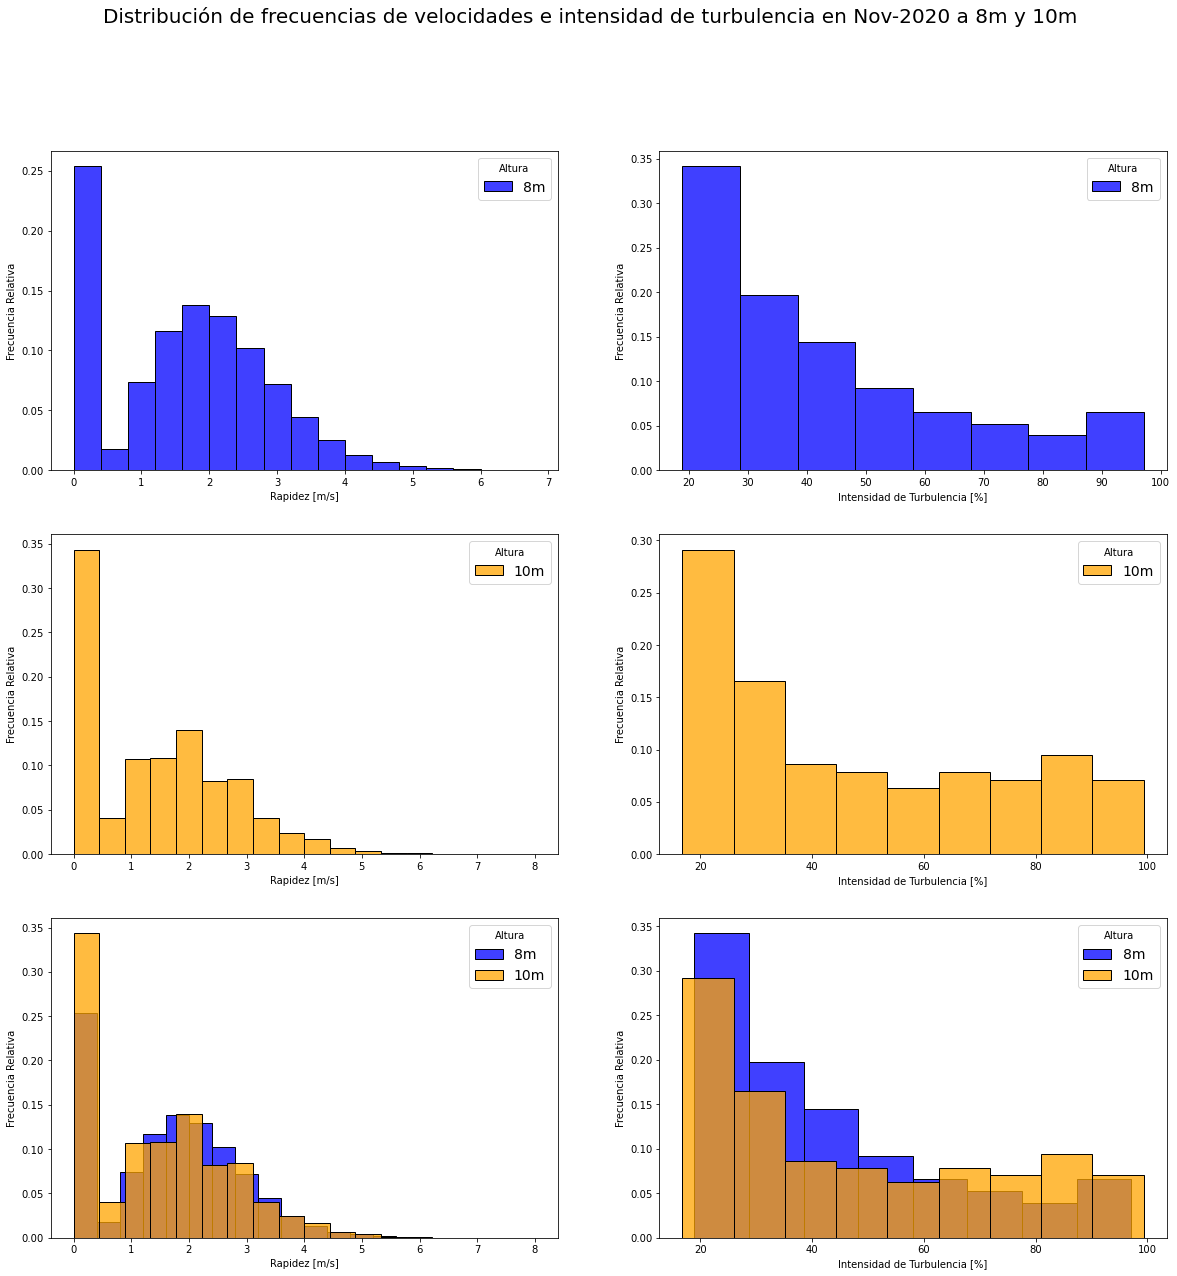

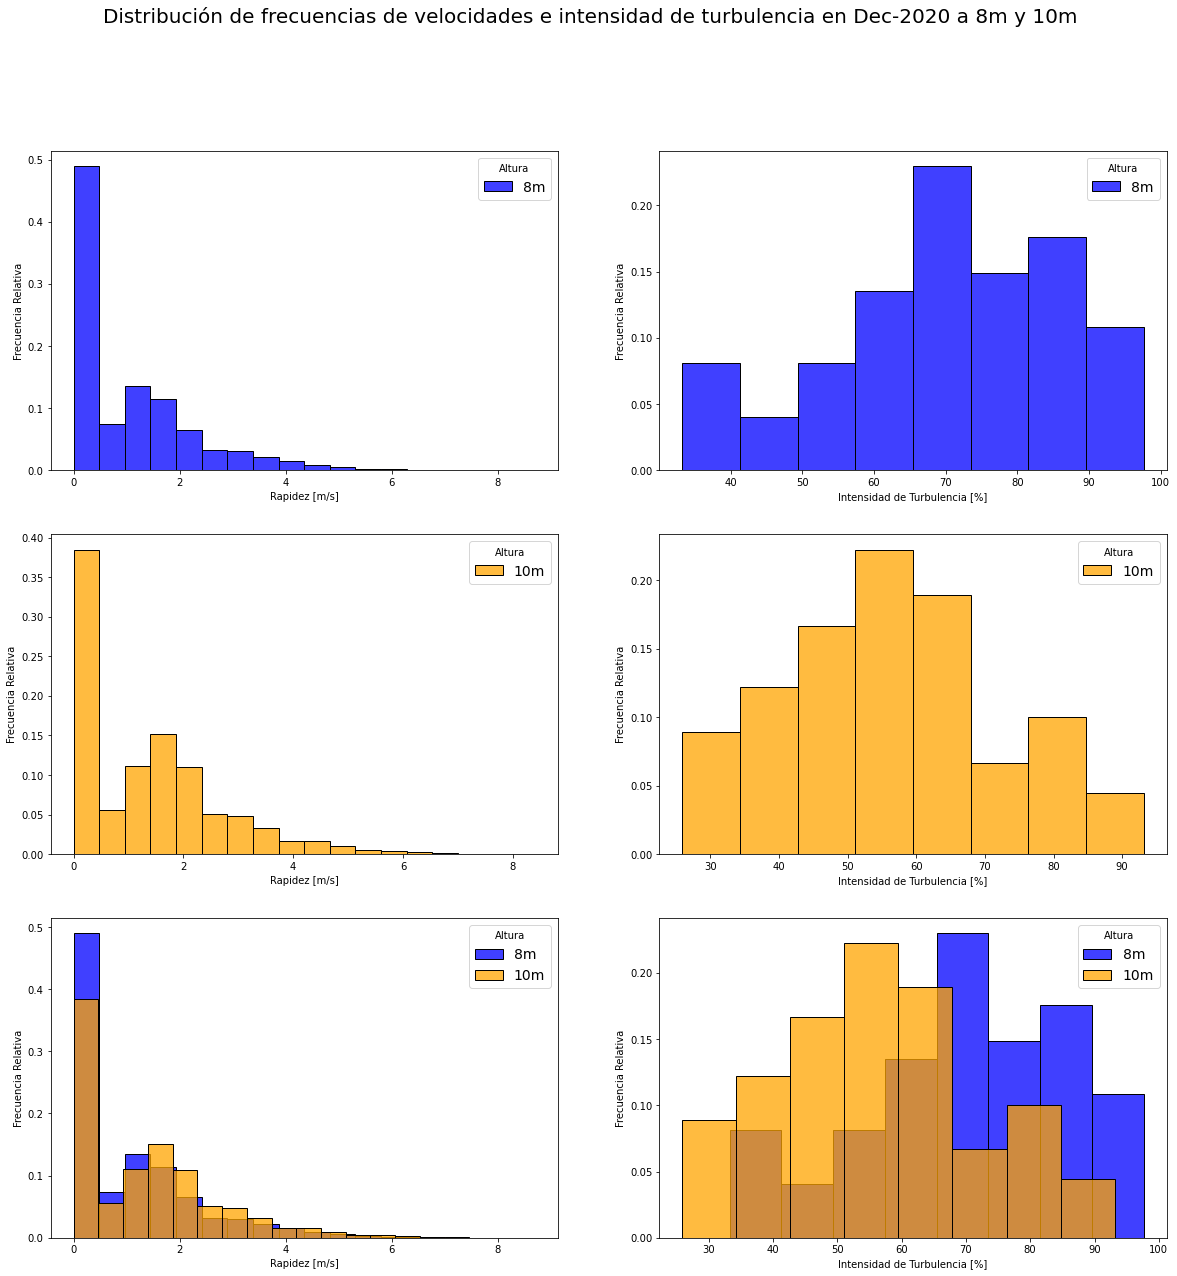

In [72]:
for i in range(1,13):
    HistogramasViento(datos_8m,datos_10m,i,2020)